In [ ]:
import random
import numpy as np
import tensorflow as tf

SEED = 42 

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# !rm -rf /kaggle/working/*  ---> this for clearing the output

In [ ]:
# No need to run this block 

!pip install protobuf==3.20.3 --force-reinstall --quiet
!pip install mediapipe --force-reinstall --quiet

import google.protobuf
print(google.protobuf.__version__)

# 3.20.3


In [62]:
!pip install facenet-pytorch --quiet

In [63]:
import tensorflow as tf
print(tf.__version__)

2.18.0



Folder: Closed
Number of images: 660


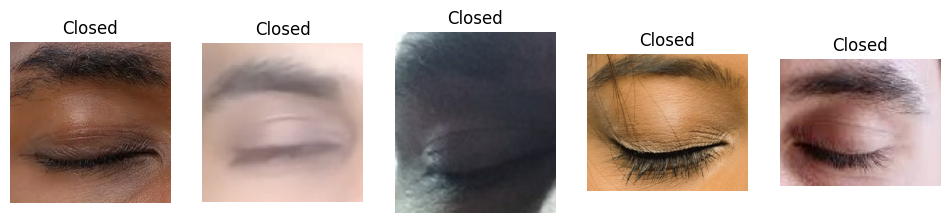

⚠️ Images in Closed are of different sizes

Folder: Open
Number of images: 663


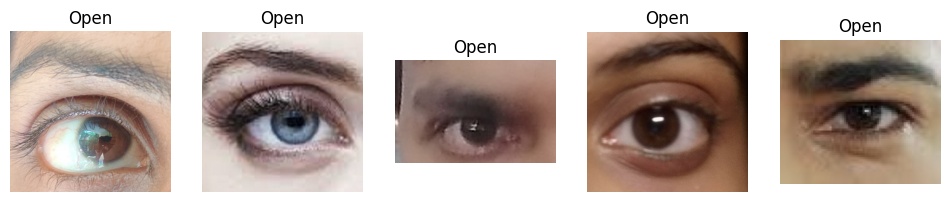

⚠️ Images in Open are of different sizes

Folder: yawn
Number of images: 723


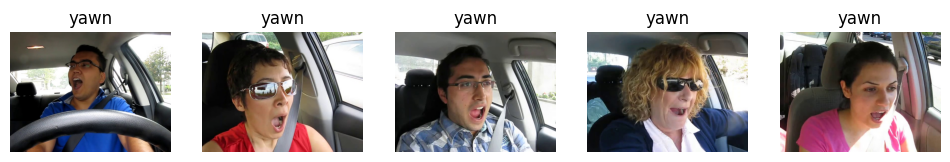

✅ All images in yawn are of the same size: (480, 640)

Folder: no_yawn
Number of images: 725


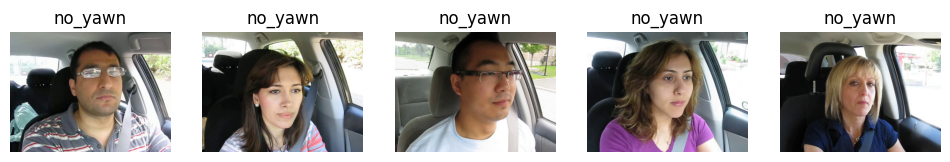

✅ All images in no_yawn are of the same size: (480, 640)


In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


# dataset path
data_dir = '/kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train'

# folders inside train
folders = ['Closed', 'Open', 'yawn', 'no_yawn']

# dictionary to store counts
image_counts = {}

# loop through folders
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    images = os.listdir(folder_path)
    image_counts[folder] = len(images)
    
    print(f"\nFolder: {folder}")
    print(f"Number of images: {len(images)}")
    
    # plot 5 sample images
    plt.figure(figsize=(12, 6))
    for i, img_name in enumerate(images[:5]):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(folder)
    plt.show()
    
    # check image sizes
    sizes = set()
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            sizes.add(img.shape[:2])  # (height, width)
    
    if len(sizes) == 1:
        print(f"✅ All images in {folder} are of the same size: {list(sizes)[0]}")
    else:
        print(f"⚠️ Images in {folder} are of different sizes")


### **Face Crop Using HAAR Cascade model Method 1**

In [85]:

import cv2
import os
from pathlib import Path

# Paths to Kaggle Working Directory (Writable)
working_dir = '/kaggle/working'
yawn_crop_dir = os.path.join(working_dir, 'yawnCrop')
no_yawn_crop_dir = os.path.join(working_dir, 'no_yawnCrop')

# Create the new directories in the working directory
Path(yawn_crop_dir).mkdir(parents=True, exist_ok=True)
Path(no_yawn_crop_dir).mkdir(parents=True, exist_ok=True)

# Load OpenCV's Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def crop_and_save_faces(source_dir, destination_dir):
    # Loop through all images in the source directory
    for img_name in os.listdir(source_dir):
        img_path = os.path.join(source_dir, img_name)
        
        # Read the image (in color format)
        img = cv2.imread(img_path)
        
        # Detect faces in color image
        faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        # If faces are detected, crop and save them
        for i, (x, y, w, h) in enumerate(faces):
            # Crop the face from the color image
            face = img[y:y+h, x:x+w]
            
            # Save the cropped face in the destination folder
            crop_name = f"{os.path.splitext(img_name)[0]}_face_{i+1}.jpg"
            crop_path = os.path.join(destination_dir, crop_name)
            cv2.imwrite(crop_path, face)

# Example paths to your original images (these should still be in /kaggle/input/)
yawn_dir = '/kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn'
no_yawn_dir = '/kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn'

# Crop and save faces for 'yawn' images
crop_and_save_faces(yawn_dir, yawn_crop_dir)

# Crop and save faces for 'no_yawn' images
crop_and_save_faces(no_yawn_dir, no_yawn_crop_dir)

print("Face cropping and saving completed!")


Face cropping and saving completed!


In [90]:
import os
import random
import cv2
import matplotlib.pyplot as plt


# Function to show 5 random images from a folder
def show_random_images(folder_path, title, num_images=5):
    image_files = os.listdir(folder_path)
    selected_images = random.sample(image_files, num_images)
    
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f"{title} #{i+1}")
        plt.axis('off')
    plt.suptitle(f"Random {num_images} Images from {title} Class", fontsize=16)
    plt.show()



def check_same_shape(folder_path):
    image_shapes = []
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Unable to load {img_file}")
            continue
        image_shapes.append(img.shape)
    
    if len(image_shapes) == 0:
        print(f"No valid images found in {folder_path}")
        return
    
    first_shape = image_shapes[0]
    all_same = all(shape == first_shape for shape in image_shapes)
    
    print(f"All images in '{os.path.basename(folder_path)}' have the same shape? {'Yes' if all_same else 'No'}")


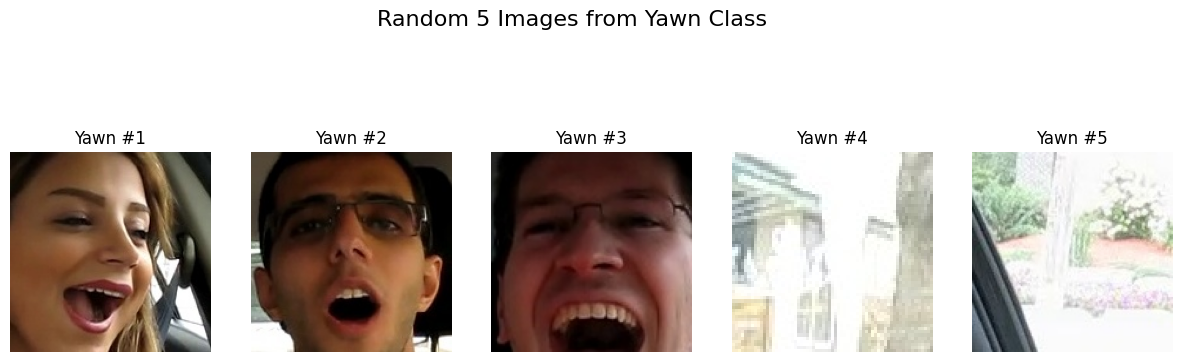

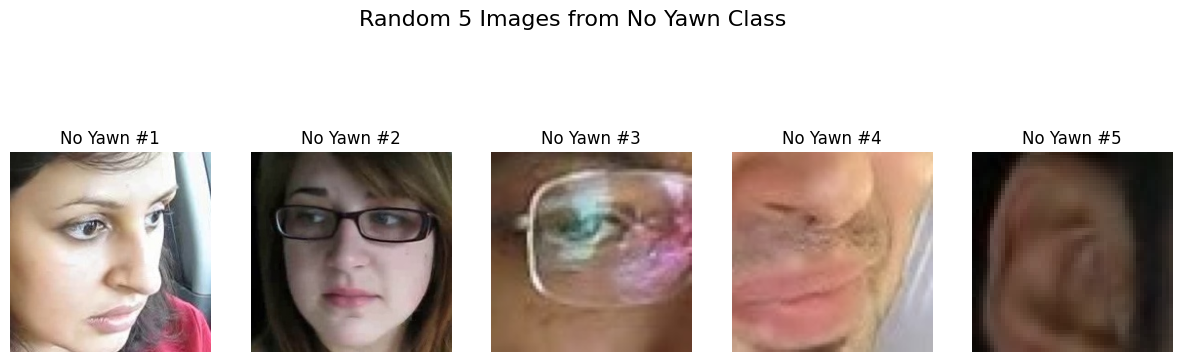

Number of images in 'yawnCrop': 497
All images in 'yawnCrop' have the same shape? No
Number of images in 'no_yawnCrop': 469
All images in 'no_yawnCrop' have the same shape? No


In [91]:
# Paths to cropped image folders in /kaggle/working
yawn_crop_dir = '/kaggle/working/yawnCrop'
no_yawn_crop_dir = '/kaggle/working/no_yawnCrop'


# Show 5 random images from each class
show_random_images(yawn_crop_dir, 'Yawn')
show_random_images(no_yawn_crop_dir, 'No Yawn')


# Folder paths
yawn_crop_dir = '/kaggle/working/yawnCrop'
no_yawn_crop_dir = '/kaggle/working/no_yawnCrop'

# Count images and check shape consistency
print(f"Number of images in '{os.path.basename(yawn_crop_dir)}': {len(os.listdir(yawn_crop_dir))}")
check_same_shape(yawn_crop_dir)

print(f"Number of images in '{os.path.basename(no_yawn_crop_dir)}': {len(os.listdir(no_yawn_crop_dir))}")
check_same_shape(no_yawn_crop_dir)


# This model not work very good, and also skips many images because of not able to find face in them 


### **FACE CROP Method 2 HAAR** 

In [51]:
import os
import cv2
from tqdm import tqdm

# === 1. Setup paths ===

# Input (read-only)
data_dir = '/kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train'
yawn_dir = os.path.join(data_dir, 'yawn')
no_yawn_dir = os.path.join(data_dir, 'no_yawn')

# Output (writable, inside working directory)
output_base = '/kaggle/working/train_cropped'
yawn_crop_dir = os.path.join(output_base, 'yawnCrop')
no_yawn_crop_dir = os.path.join(output_base, 'no_yawnCrop')

os.makedirs(yawn_crop_dir, exist_ok=True)
os.makedirs(no_yawn_crop_dir, exist_ok=True)

# === 2. Load OpenCV face detector ===
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# === 3. Define function to crop face ===

def crop_face(image_path, save_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load {image_path}")
        return False
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    if len(faces) == 0:
        print(f"No face found in {image_path}, skipping.")
        return False
    
    # Crop first detected face
    (x, y, w, h) = faces[0]
    face_img = img[y:y+h, x:x+w]
    
    # Save cropped face image
    cv2.imwrite(save_path, face_img)
    return True

# === 4. Process folders and crop images ===

def process_folder(input_folder, output_folder):
    filenames = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for filename in tqdm(filenames, desc=f"Processing {os.path.basename(input_folder)}"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        crop_face(input_path, output_path)

process_folder(yawn_dir, yawn_crop_dir)
process_folder(no_yawn_dir, no_yawn_crop_dir)


# This basic HAAR model is not so good in face cropping, and it skips many images because it cant able to find faces in those ...

Processing yawn:   0%|          | 3/723 [00:00<02:01,  5.91it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/623.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/208.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/473.jpg, skipping.


Processing yawn:   1%|          | 5/723 [00:00<01:29,  8.00it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/333.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/537.jpg, skipping.


Processing yawn:   2%|▏         | 13/723 [00:01<01:03, 11.17it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/275.jpg, skipping.


Processing yawn:   3%|▎         | 23/723 [00:02<00:57, 12.12it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/436.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/539.jpg, skipping.


Processing yawn:   4%|▍         | 31/723 [00:02<00:56, 12.31it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/474.jpg, skipping.


Processing yawn:   5%|▍         | 33/723 [00:03<00:58, 11.85it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/429.jpg, skipping.


Processing yawn:   5%|▌         | 37/723 [00:03<00:55, 12.35it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/377.jpg, skipping.


Processing yawn:   5%|▌         | 39/723 [00:03<00:54, 12.54it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/182.jpg, skipping.


Processing yawn:   7%|▋         | 47/723 [00:04<00:54, 12.39it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/703.jpg, skipping.


Processing yawn:   7%|▋         | 51/723 [00:04<00:56, 11.99it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/476.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/327.jpg, skipping.


Processing yawn:   7%|▋         | 53/723 [00:04<00:53, 12.49it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/253.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/115.jpg, skipping.


Processing yawn:   8%|▊         | 57/723 [00:05<00:53, 12.34it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/446.jpg, skipping.


Processing yawn:   9%|▉         | 65/723 [00:05<00:51, 12.76it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/503.jpg, skipping.


Processing yawn:   9%|▉         | 67/723 [00:05<00:50, 13.07it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/622.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/440.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/260.jpg, skipping.


Processing yawn:  10%|▉         | 71/723 [00:06<00:50, 12.84it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/534.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/84.jpg, skipping.


Processing yawn:  10%|█         | 75/723 [00:06<00:53, 12.19it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/273.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/286.jpg, skipping.


Processing yawn:  11%|█         | 79/723 [00:06<00:51, 12.42it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/486.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/513.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/85.jpg, skipping.


Processing yawn:  11%|█▏        | 83/723 [00:07<00:51, 12.50it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/359.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/67.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/265.jpg, skipping.


Processing yawn:  12%|█▏        | 85/723 [00:07<00:49, 12.81it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/289.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/118.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/361.jpg, skipping.


Processing yawn:  12%|█▏        | 89/723 [00:07<00:50, 12.63it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/82.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/443.jpg, skipping.


Processing yawn:  13%|█▎        | 93/723 [00:07<00:49, 12.75it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/295.jpg, skipping.


Processing yawn:  13%|█▎        | 95/723 [00:08<00:50, 12.52it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/668.jpg, skipping.


Processing yawn:  14%|█▎        | 99/723 [00:08<00:53, 11.69it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/334.jpg, skipping.


Processing yawn:  14%|█▍        | 101/723 [00:08<00:52, 11.92it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/113.jpg, skipping.


Processing yawn:  15%|█▍        | 105/723 [00:08<00:52, 11.80it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/38.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/463.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/349.jpg, skipping.


Processing yawn:  15%|█▍        | 107/723 [00:09<00:51, 12.07it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/490.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/328.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/211.jpg, skipping.


Processing yawn:  15%|█▌        | 111/723 [00:09<00:49, 12.40it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/42.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/291.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/197.jpg, skipping.


Processing yawn:  16%|█▌        | 113/723 [00:09<00:49, 12.25it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/704.jpg, skipping.


Processing yawn:  16%|█▌        | 117/723 [00:09<00:50, 12.04it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/234.jpg, skipping.


Processing yawn:  17%|█▋        | 123/723 [00:10<00:49, 12.23it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/251.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/665.jpg, skipping.


Processing yawn:  18%|█▊        | 127/723 [00:10<00:51, 11.61it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/62.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/589.jpg, skipping.


Processing yawn:  18%|█▊        | 131/723 [00:11<00:50, 11.80it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/380.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/120.jpg, skipping.


Processing yawn:  19%|█▉        | 137/723 [00:11<00:49, 11.73it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/629.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/290.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/61.jpg, skipping.


Processing yawn:  20%|█▉        | 141/723 [00:11<00:50, 11.58it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/441.jpg, skipping.


Processing yawn:  20%|██        | 145/723 [00:12<00:48, 11.89it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/427.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/59.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/604.jpg, skipping.


Processing yawn:  21%|██        | 151/723 [00:12<00:48, 11.86it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/379.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/313.jpg, skipping.


Processing yawn:  21%|██        | 153/723 [00:12<00:47, 12.06it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/601.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/274.jpg, skipping.


Processing yawn:  22%|██▏       | 161/723 [00:13<00:47, 11.89it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/480.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/620.jpg, skipping.


Processing yawn:  23%|██▎       | 163/723 [00:13<00:46, 12.10it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/248.jpg, skipping.


Processing yawn:  23%|██▎       | 167/723 [00:14<00:45, 12.30it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/580.jpg, skipping.


Processing yawn:  24%|██▎       | 171/723 [00:14<00:43, 12.65it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/509.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/256.jpg, skipping.


Processing yawn:  24%|██▍       | 173/723 [00:14<00:43, 12.50it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/247.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/477.jpg, skipping.


Processing yawn:  24%|██▍       | 177/723 [00:14<00:44, 12.14it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/362.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/60.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/627.jpg, skipping.


Processing yawn:  25%|██▍       | 179/723 [00:15<00:43, 12.65it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/538.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/221.jpg, skipping.


Processing yawn:  25%|██▌       | 183/723 [00:15<00:43, 12.44it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/515.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/112.jpg, skipping.


Processing yawn:  26%|██▌       | 187/723 [00:15<00:44, 12.17it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/664.jpg, skipping.


Processing yawn:  26%|██▌       | 189/723 [00:15<00:44, 11.98it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/478.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/193.jpg, skipping.


Processing yawn:  27%|██▋       | 197/723 [00:16<00:42, 12.48it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/192.jpg, skipping.


Processing yawn:  28%|██▊       | 203/723 [00:16<00:41, 12.40it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/705.jpg, skipping.


Processing yawn:  29%|██▊       | 207/723 [00:17<00:41, 12.49it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/382.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/311.jpg, skipping.


Processing yawn:  29%|██▉       | 211/723 [00:17<00:40, 12.76it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/37.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/340.jpg, skipping.


Processing yawn:  30%|██▉       | 215/723 [00:17<00:38, 13.15it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/1.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/524.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/529.jpg, skipping.


Processing yawn:  30%|███       | 217/723 [00:18<00:39, 12.80it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/177.jpg, skipping.


Processing yawn:  31%|███       | 221/723 [00:18<00:38, 13.00it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/358.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/69.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/468.jpg, skipping.


Processing yawn:  32%|███▏      | 229/723 [00:18<00:37, 13.18it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/117.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/81.jpg, skipping.


Processing yawn:  33%|███▎      | 235/723 [00:19<00:37, 12.90it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/254.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/381.jpg, skipping.


Processing yawn:  33%|███▎      | 237/723 [00:19<00:37, 12.82it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/535.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/424.jpg, skipping.


Processing yawn:  33%|███▎      | 241/723 [00:19<00:37, 12.87it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/494.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/481.jpg, skipping.


Processing yawn:  34%|███▎      | 243/723 [00:20<00:39, 12.31it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/444.jpg, skipping.


Processing yawn:  34%|███▍      | 247/723 [00:20<00:38, 12.46it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/560.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/319.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/137.jpg, skipping.


Processing yawn:  35%|███▍      | 251/723 [00:20<00:38, 12.24it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/525.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/574.jpg, skipping.


Processing yawn:  35%|███▍      | 253/723 [00:20<00:38, 12.30it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/267.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/561.jpg, skipping.


Processing yawn:  36%|███▌      | 257/723 [00:21<00:36, 12.60it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/563.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/65.jpg, skipping.


Processing yawn:  37%|███▋      | 265/723 [00:21<00:37, 12.24it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/196.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/29.jpg, skipping.


Processing yawn:  37%|███▋      | 269/723 [00:22<00:36, 12.50it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/531.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/235.jpg, skipping.


Processing yawn:  38%|███▊      | 275/723 [00:22<00:34, 12.90it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/79.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/302.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/179.jpg, skipping.


Processing yawn:  38%|███▊      | 277/723 [00:22<00:33, 13.22it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/284.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/285.jpg, skipping.


Processing yawn:  40%|███▉      | 287/723 [00:23<00:37, 11.76it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/111.jpg, skipping.


Processing yawn:  40%|███▉      | 289/723 [00:23<00:36, 11.97it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/317.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/619.jpg, skipping.


Processing yawn:  41%|████▏     | 299/723 [00:24<00:34, 12.27it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/541.jpg, skipping.


Processing yawn:  42%|████▏     | 307/723 [00:25<00:29, 14.14it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/225.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/252.jpg, skipping.


Processing yawn:  43%|████▎     | 309/723 [00:25<00:28, 14.29it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/292.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/466.jpg, skipping.


Processing yawn:  44%|████▍     | 317/723 [00:25<00:32, 12.63it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/121.jpg, skipping.


Processing yawn:  44%|████▍     | 321/723 [00:26<00:31, 12.88it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/378.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/573.jpg, skipping.


Processing yawn:  45%|████▍     | 323/723 [00:26<00:31, 12.90it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/691.jpg, skipping.


Processing yawn:  46%|████▌     | 329/723 [00:26<00:30, 12.73it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/329.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/258.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/498.jpg, skipping.


Processing yawn:  46%|████▌     | 333/723 [00:27<00:31, 12.47it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/603.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/392.jpg, skipping.


Processing yawn:  47%|████▋     | 337/723 [00:27<00:31, 12.18it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/40.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/261.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/391.jpg, skipping.


Processing yawn:  47%|████▋     | 341/723 [00:27<00:31, 12.10it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/357.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/332.jpg, skipping.


Processing yawn:  48%|████▊     | 345/723 [00:28<00:31, 11.95it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/296.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/346.jpg, skipping.


Processing yawn:  48%|████▊     | 347/723 [00:28<00:32, 11.66it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/554.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/308.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/264.jpg, skipping.


Processing yawn:  49%|████▉     | 353/723 [00:28<00:30, 12.07it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/310.jpg, skipping.


Processing yawn:  49%|████▉     | 357/723 [00:29<00:29, 12.41it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/339.jpg, skipping.


Processing yawn:  50%|█████     | 363/723 [00:29<00:27, 13.06it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/555.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/421.jpg, skipping.


Processing yawn:  51%|█████     | 369/723 [00:30<00:29, 12.09it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/663.jpg, skipping.


Processing yawn:  52%|█████▏    | 375/723 [00:30<00:30, 11.49it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/88.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/465.jpg, skipping.


Processing yawn:  52%|█████▏    | 379/723 [00:31<00:31, 11.07it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/64.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/352.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/287.jpg, skipping.


Processing yawn:  53%|█████▎    | 381/723 [00:31<00:30, 11.31it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/269.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/326.jpg, skipping.


Processing yawn:  54%|█████▍    | 389/723 [00:31<00:28, 11.59it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/158.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/587.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/575.jpg, skipping.


Processing yawn:  55%|█████▍    | 395/723 [00:32<00:27, 12.02it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/31.jpg, skipping.


Processing yawn:  55%|█████▍    | 397/723 [00:32<00:27, 11.95it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/195.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/255.jpg, skipping.


Processing yawn:  55%|█████▌    | 401/723 [00:32<00:26, 12.13it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/114.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/552.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/693.jpg, skipping.


Processing yawn:  57%|█████▋    | 409/723 [00:33<00:24, 12.58it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/496.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/207.jpg, skipping.


Processing yawn:  57%|█████▋    | 413/723 [00:33<00:25, 12.35it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/209.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/598.jpg, skipping.


Processing yawn:  57%|█████▋    | 415/723 [00:34<00:25, 11.93it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/376.jpg, skipping.


Processing yawn:  58%|█████▊    | 419/723 [00:34<00:26, 11.47it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/617.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/323.jpg, skipping.


Processing yawn:  59%|█████▊    | 423/723 [00:34<00:25, 11.97it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/667.jpg, skipping.


Processing yawn:  59%|█████▉    | 427/723 [00:35<00:24, 11.98it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/223.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/417.jpg, skipping.


Processing yawn:  59%|█████▉    | 429/723 [00:35<00:25, 11.74it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/447.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/363.jpg, skipping.


Processing yawn:  60%|█████▉    | 433/723 [00:35<00:24, 11.78it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/68.jpg, skipping.


Processing yawn:  60%|██████    | 435/723 [00:35<00:25, 11.41it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/83.jpg, skipping.


Processing yawn:  61%|██████▏   | 443/723 [00:36<00:24, 11.51it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/206.jpg, skipping.


Processing yawn:  62%|██████▏   | 447/723 [00:36<00:23, 11.95it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/301.jpg, skipping.


Processing yawn:  62%|██████▏   | 449/723 [00:36<00:22, 12.23it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/161.jpg, skipping.


Processing yawn:  63%|██████▎   | 455/723 [00:37<00:22, 11.90it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/618.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/331.jpg, skipping.


Processing yawn:  63%|██████▎   | 459/723 [00:37<00:21, 12.01it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/624.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/257.jpg, skipping.


Processing yawn:  64%|██████▍   | 461/723 [00:37<00:22, 11.66it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/445.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/578.jpg, skipping.


Processing yawn:  65%|██████▍   | 467/723 [00:38<00:21, 11.75it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/416.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/321.jpg, skipping.


Processing yawn:  67%|██████▋   | 481/723 [00:39<00:20, 12.04it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/492.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/438.jpg, skipping.


Processing yawn:  67%|██████▋   | 485/723 [00:40<00:20, 11.74it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/26.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/351.jpg, skipping.


Processing yawn:  68%|██████▊   | 489/723 [00:40<00:19, 11.83it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/183.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/39.jpg, skipping.


Processing yawn:  68%|██████▊   | 493/723 [00:40<00:20, 11.44it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/602.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/459.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/288.jpg, skipping.


Processing yawn:  69%|██████▊   | 497/723 [00:41<00:20, 11.29it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/360.jpg, skipping.


Processing yawn:  69%|██████▉   | 501/723 [00:41<00:18, 11.72it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/222.jpg, skipping.


Processing yawn:  70%|██████▉   | 505/723 [00:41<00:18, 11.73it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/628.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/692.jpg, skipping.


Processing yawn:  70%|███████   | 509/723 [00:42<00:18, 11.88it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/487.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/119.jpg, skipping.


Processing yawn:  71%|███████   | 513/723 [00:42<00:16, 12.55it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/204.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/606.jpg, skipping.


Processing yawn:  72%|███████▏  | 519/723 [00:42<00:17, 11.95it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/224.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/706.jpg, skipping.


Processing yawn:  73%|███████▎  | 525/723 [00:43<00:17, 11.06it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/495.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/293.jpg, skipping.


Processing yawn:  73%|███████▎  | 527/723 [00:43<00:17, 11.24it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/497.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/305.jpg, skipping.


Processing yawn:  73%|███████▎  | 531/723 [00:44<00:16, 11.71it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/491.jpg, skipping.


Processing yawn:  74%|███████▍  | 535/723 [00:44<00:15, 12.39it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/439.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/210.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/453.jpg, skipping.


Processing yawn:  75%|███████▍  | 539/723 [00:44<00:14, 12.51it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/181.jpg, skipping.


Processing yawn:  75%|███████▌  | 543/723 [00:44<00:14, 12.46it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/533.jpg, skipping.


Processing yawn:  76%|███████▌  | 547/723 [00:45<00:14, 12.05it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/550.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/472.jpg, skipping.


Processing yawn:  76%|███████▌  | 549/723 [00:45<00:14, 11.81it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/259.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/389.jpg, skipping.


Processing yawn:  76%|███████▋  | 553/723 [00:45<00:14, 11.97it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/661.jpg, skipping.


Processing yawn:  77%|███████▋  | 555/723 [00:45<00:14, 11.76it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/27.jpg, skipping.


Processing yawn:  78%|███████▊  | 561/723 [00:46<00:14, 11.53it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/294.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/479.jpg, skipping.


Processing yawn:  78%|███████▊  | 565/723 [00:46<00:13, 11.37it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/673.jpg, skipping.


Processing yawn:  79%|███████▉  | 571/723 [00:47<00:13, 11.27it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/341.jpg, skipping.


Processing yawn:  79%|███████▉  | 573/723 [00:47<00:13, 11.44it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/418.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/309.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/365.jpg, skipping.


Processing yawn:  80%|███████▉  | 577/723 [00:47<00:12, 11.52it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/312.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/184.jpg, skipping.


Processing yawn:  80%|████████  | 581/723 [00:48<00:12, 11.41it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/688.jpg, skipping.


Processing yawn:  81%|████████  | 585/723 [00:48<00:11, 11.79it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/540.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/493.jpg, skipping.


Processing yawn:  81%|████████▏ | 589/723 [00:48<00:11, 11.63it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/666.jpg, skipping.


Processing yawn:  82%|████████▏ | 593/723 [00:49<00:11, 11.60it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/553.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/3.jpg, skipping.


Processing yawn:  83%|████████▎ | 597/723 [00:49<00:11, 11.17it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/384.jpg, skipping.


Processing yawn:  83%|████████▎ | 601/723 [00:50<00:10, 11.56it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/694.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/536.jpg, skipping.


Processing yawn:  83%|████████▎ | 603/723 [00:50<00:10, 11.47it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/608.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/386.jpg, skipping.


Processing yawn:  84%|████████▎ | 605/723 [00:50<00:10, 11.65it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/600.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/348.jpg, skipping.


Processing yawn:  85%|████████▍ | 611/723 [00:50<00:09, 11.39it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/662.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/110.jpg, skipping.


Processing yawn:  85%|████████▌ | 617/723 [00:51<00:09, 11.55it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/325.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/437.jpg, skipping.


Processing yawn:  86%|████████▌ | 623/723 [00:51<00:08, 11.81it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/385.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/625.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/475.jpg, skipping.


Processing yawn:  86%|████████▋ | 625/723 [00:52<00:08, 11.25it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/471.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/63.jpg, skipping.


Processing yawn:  87%|████████▋ | 629/723 [00:52<00:07, 11.77it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/162.jpg, skipping.


Processing yawn:  88%|████████▊ | 635/723 [00:52<00:07, 11.80it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/303.jpg, skipping.


Processing yawn:  89%|████████▉ | 643/723 [00:53<00:07, 11.01it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/612.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/562.jpg, skipping.


Processing yawn:  89%|████████▉ | 645/723 [00:53<00:07, 10.87it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/547.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/470.jpg, skipping.


Processing yawn:  90%|████████▉ | 649/723 [00:54<00:06, 11.34it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/707.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/428.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/324.jpg, skipping.


Processing yawn:  90%|█████████ | 653/723 [00:54<00:06, 11.33it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/689.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/549.jpg, skipping.


Processing yawn:  91%|█████████▏| 661/723 [00:55<00:05, 11.94it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/268.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/517.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/526.jpg, skipping.


Processing yawn:  92%|█████████▏| 665/723 [00:55<00:04, 11.88it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/316.jpg, skipping.


Processing yawn:  93%|█████████▎| 669/723 [00:55<00:04, 11.48it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/462.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/116.jpg, skipping.


Processing yawn:  93%|█████████▎| 671/723 [00:56<00:04, 12.07it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/78.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/320.jpg, skipping.


Processing yawn:  93%|█████████▎| 675/723 [00:56<00:04, 11.75it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/266.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/335.jpg, skipping.


Processing yawn:  94%|█████████▍| 679/723 [00:56<00:03, 11.70it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/460.jpg, skipping.


Processing yawn:  95%|█████████▌| 687/723 [00:57<00:03, 12.00it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/714.jpg, skipping.


Processing yawn:  95%|█████████▌| 689/723 [00:57<00:02, 12.07it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/66.jpg, skipping.


Processing yawn:  96%|█████████▋| 697/723 [00:58<00:02, 12.96it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/423.jpg, skipping.


Processing yawn:  97%|█████████▋| 703/723 [00:58<00:01, 13.21it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/2.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/205.jpg, skipping.


Processing yawn:  98%|█████████▊| 707/723 [00:59<00:01, 12.14it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/304.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/315.jpg, skipping.


Processing yawn:  99%|█████████▉| 715/723 [00:59<00:00, 12.09it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/597.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/461.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/136.jpg, skipping.


Processing yawn:  99%|█████████▉| 719/723 [01:00<00:00, 11.87it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/454.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/605.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/364.jpg, skipping.


Processing yawn: 100%|██████████| 723/723 [01:00<00:00, 11.98it/s]


No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/yawn/599.jpg, skipping.


Processing no_yawn:   0%|          | 2/725 [00:00<01:04, 11.26it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1269.jpg, skipping.


Processing no_yawn:   2%|▏         | 12/725 [00:01<01:00, 11.77it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2532.jpg, skipping.


Processing no_yawn:   2%|▏         | 16/725 [00:01<01:00, 11.65it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2057.jpg, skipping.


Processing no_yawn:   3%|▎         | 20/725 [00:01<00:59, 11.81it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/6.jpg, skipping.


Processing no_yawn:   3%|▎         | 24/725 [00:01<00:54, 12.89it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/436.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/76.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/71.jpg, skipping.


Processing no_yawn:   4%|▍         | 28/725 [00:02<00:52, 13.31it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2580.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/760.jpg, skipping.


Processing no_yawn:   4%|▍         | 30/725 [00:02<00:53, 13.05it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1459.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/646.jpg, skipping.


Processing no_yawn:   5%|▍         | 34/725 [00:02<00:56, 12.20it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1934.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2067.jpg, skipping.


Processing no_yawn:   5%|▍         | 36/725 [00:02<00:56, 12.16it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2571.jpg, skipping.


Processing no_yawn:   6%|▌         | 40/725 [00:03<00:55, 12.37it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/703.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2403.jpg, skipping.


Processing no_yawn:   6%|▌         | 44/725 [00:03<00:52, 13.03it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2517.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2087.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/446.jpg, skipping.


Processing no_yawn:   7%|▋         | 48/725 [00:03<00:53, 12.74it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1498.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1559.jpg, skipping.


Processing no_yawn:   7%|▋         | 50/725 [00:04<00:55, 12.25it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1327.jpg, skipping.


Processing no_yawn:   7%|▋         | 54/725 [00:04<00:54, 12.29it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1376.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2573.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/8.jpg, skipping.


Processing no_yawn:   8%|▊         | 58/725 [00:04<00:55, 12.11it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/641.jpg, skipping.


Processing no_yawn:   9%|▊         | 62/725 [00:05<00:57, 11.63it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2476.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/988.jpg, skipping.


Processing no_yawn:  10%|▉         | 70/725 [00:05<00:50, 13.02it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2537.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2091.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/443.jpg, skipping.


Processing no_yawn:  10%|█         | 74/725 [00:05<00:49, 13.07it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/176.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1499.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/279.jpg, skipping.


Processing no_yawn:  11%|█         | 78/725 [00:06<00:50, 12.91it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1172.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2500.jpg, skipping.


Processing no_yawn:  11%|█         | 80/725 [00:06<00:52, 12.32it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/994.jpg, skipping.


Processing no_yawn:  12%|█▏        | 90/725 [00:07<00:48, 13.21it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/234.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/271.jpg, skipping.


Processing no_yawn:  13%|█▎        | 94/725 [00:07<00:50, 12.40it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/683.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1371.jpg, skipping.


Processing no_yawn:  13%|█▎        | 96/725 [00:07<00:49, 12.77it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2431.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/833.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1268.jpg, skipping.


Processing no_yawn:  14%|█▍        | 100/725 [00:08<00:50, 12.35it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2312.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/278.jpg, skipping.


Processing no_yawn:  14%|█▍        | 104/725 [00:08<00:50, 12.24it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1118.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2159.jpg, skipping.


Processing no_yawn:  15%|█▍        | 108/725 [00:08<00:50, 12.33it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1571.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2286.jpg, skipping.


Processing no_yawn:  16%|█▌        | 116/725 [00:09<00:49, 12.30it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1706.jpg, skipping.


Processing no_yawn:  17%|█▋        | 120/725 [00:09<00:45, 13.25it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/73.jpg, skipping.


Processing no_yawn:  17%|█▋        | 122/725 [00:09<00:46, 12.93it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/601.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/98.jpg, skipping.


Processing no_yawn:  18%|█▊        | 128/725 [00:10<00:45, 13.09it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2541.jpg, skipping.


Processing no_yawn:  19%|█▉        | 138/725 [00:10<00:40, 14.65it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/94.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1987.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2547.jpg, skipping.


Processing no_yawn:  20%|█▉        | 144/725 [00:11<00:42, 13.63it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/639.jpg, skipping.


Processing no_yawn:  20%|██        | 146/725 [00:11<00:43, 13.42it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1496.jpg, skipping.


Processing no_yawn:  21%|██        | 150/725 [00:11<00:42, 13.40it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2589.jpg, skipping.


Processing no_yawn:  21%|██        | 154/725 [00:12<00:42, 13.30it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1963.jpg, skipping.


Processing no_yawn:  22%|██▏       | 160/725 [00:12<00:41, 13.48it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/831.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2518.jpg, skipping.


Processing no_yawn:  23%|██▎       | 166/725 [00:13<00:42, 13.04it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1642.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/177.jpg, skipping.


Processing no_yawn:  23%|██▎       | 170/725 [00:13<00:43, 12.78it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/868.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1967.jpg, skipping.


Processing no_yawn:  25%|██▍       | 180/725 [00:14<00:44, 12.34it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/660.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2477.jpg, skipping.


Processing no_yawn:  26%|██▌       | 186/725 [00:14<00:40, 13.24it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1122.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/299.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1686.jpg, skipping.


Processing no_yawn:  26%|██▋       | 192/725 [00:15<00:40, 13.24it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1462.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1543.jpg, skipping.


Processing no_yawn:  27%|██▋       | 194/725 [00:15<00:41, 12.74it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1487.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/276.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1690.jpg, skipping.


Processing no_yawn:  27%|██▋       | 198/725 [00:15<00:41, 12.77it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2496.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/525.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1532.jpg, skipping.


Processing no_yawn:  28%|██▊       | 202/725 [00:15<00:43, 11.97it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2534.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2483.jpg, skipping.


Processing no_yawn:  29%|██▉       | 210/725 [00:16<00:41, 12.55it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1497.jpg, skipping.


Processing no_yawn:  30%|██▉       | 214/725 [00:16<00:38, 13.10it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/29.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/235.jpg, skipping.


Processing no_yawn:  30%|██▉       | 216/725 [00:17<00:38, 13.18it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2440.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2479.jpg, skipping.


Processing no_yawn:  30%|███       | 220/725 [00:17<00:39, 12.91it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1266.jpg, skipping.


Processing no_yawn:  31%|███       | 222/725 [00:17<00:37, 13.25it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/79.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1736.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2406.jpg, skipping.


Processing no_yawn:  31%|███       | 226/725 [00:17<00:40, 12.19it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/179.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1261.jpg, skipping.


Processing no_yawn:  31%|███▏      | 228/725 [00:18<00:43, 11.39it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2056.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1964.jpg, skipping.


Processing no_yawn:  32%|███▏      | 232/725 [00:18<00:42, 11.63it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1988.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2201.jpg, skipping.


Processing no_yawn:  33%|███▎      | 236/725 [00:18<00:40, 12.15it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2590.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/897.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1132.jpg, skipping.


Processing no_yawn:  33%|███▎      | 238/725 [00:18<00:38, 12.78it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1558.jpg, skipping.


Processing no_yawn:  34%|███▎      | 244/725 [00:19<00:42, 11.44it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2351.jpg, skipping.


Processing no_yawn:  34%|███▍      | 246/725 [00:19<00:39, 12.11it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/317.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1133.jpg, skipping.


Processing no_yawn:  35%|███▍      | 252/725 [00:20<00:39, 11.91it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/758.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1990.jpg, skipping.


Processing no_yawn:  35%|███▌      | 254/725 [00:20<00:39, 11.98it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/7.jpg, skipping.


Processing no_yawn:  36%|███▌      | 258/725 [00:20<00:35, 13.14it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/659.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/548.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1541.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/225.jpg, skipping.


Processing no_yawn:  36%|███▌      | 262/725 [00:20<00:35, 13.00it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1572.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2428.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/77.jpg, skipping.


Processing no_yawn:  38%|███▊      | 272/725 [00:21<00:37, 12.13it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1570.jpg, skipping.


Processing no_yawn:  38%|███▊      | 274/725 [00:21<00:37, 12.19it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1493.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/28.jpg, skipping.


Processing no_yawn:  39%|███▊      | 280/725 [00:22<00:36, 12.33it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/645.jpg, skipping.


Processing no_yawn:  39%|███▉      | 282/725 [00:22<00:36, 12.21it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2153.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/997.jpg, skipping.


Processing no_yawn:  40%|███▉      | 288/725 [00:22<00:38, 11.27it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1332.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2621.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1267.jpg, skipping.


Processing no_yawn:  40%|████      | 290/725 [00:23<00:36, 11.80it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/603.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1949.jpg, skipping.


Processing no_yawn:  41%|████      | 294/725 [00:23<00:35, 12.24it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1986.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/174.jpg, skipping.


Processing no_yawn:  41%|████      | 298/725 [00:23<00:35, 11.95it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2482.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/828.jpg, skipping.


Processing no_yawn:  42%|████▏     | 302/725 [00:24<00:34, 12.27it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/543.jpg, skipping.


Processing no_yawn:  42%|████▏     | 306/725 [00:24<00:34, 12.05it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1627.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1567.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2539.jpg, skipping.


Processing no_yawn:  43%|████▎     | 312/725 [00:24<00:34, 12.08it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1131.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/918.jpg, skipping.


Processing no_yawn:  44%|████▎     | 316/725 [00:25<00:33, 12.34it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2093.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1130.jpg, skipping.


Processing no_yawn:  44%|████▍     | 320/725 [00:25<00:30, 13.23it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/931.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/555.jpg, skipping.


Processing no_yawn:  45%|████▍     | 324/725 [00:25<00:31, 12.73it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/992.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/449.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2374.jpg, skipping.


Processing no_yawn:  45%|████▌     | 328/725 [00:26<00:31, 12.47it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/24.jpg, skipping.


Processing no_yawn:  46%|████▌     | 334/725 [00:26<00:31, 12.30it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2059.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2001.jpg, skipping.


Processing no_yawn:  47%|████▋     | 338/725 [00:26<00:30, 12.75it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1486.jpg, skipping.


Processing no_yawn:  47%|████▋     | 342/725 [00:27<00:31, 12.16it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1370.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1856.jpg, skipping.


Processing no_yawn:  48%|████▊     | 346/725 [00:27<00:31, 11.89it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2609.jpg, skipping.


Processing no_yawn:  48%|████▊     | 348/725 [00:27<00:30, 12.25it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/756.jpg, skipping.


Processing no_yawn:  49%|████▊     | 352/725 [00:28<00:29, 12.67it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/552.jpg, skipping.


Processing no_yawn:  49%|████▉     | 356/725 [00:28<00:29, 12.67it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2157.jpg, skipping.


Processing no_yawn:  50%|█████     | 364/725 [00:29<00:30, 11.82it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2407.jpg, skipping.


Processing no_yawn:  51%|█████     | 368/725 [00:29<00:30, 11.77it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1270.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2433.jpg, skipping.


Processing no_yawn:  52%|█████▏    | 374/725 [00:29<00:28, 12.42it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/223.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2499.jpg, skipping.


Processing no_yawn:  52%|█████▏    | 380/725 [00:30<00:26, 12.92it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/755.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/336.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1492.jpg, skipping.


Processing no_yawn:  53%|█████▎    | 386/725 [00:30<00:27, 12.34it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1362.jpg, skipping.


Processing no_yawn:  54%|█████▍    | 390/725 [00:31<00:26, 12.57it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1508.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2311.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2511.jpg, skipping.


Processing no_yawn:  55%|█████▍    | 396/725 [00:31<00:27, 12.14it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2548.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2071.jpg, skipping.


Processing no_yawn:  55%|█████▌    | 400/725 [00:32<00:26, 12.49it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2058.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1740.jpg, skipping.


Processing no_yawn:  56%|█████▌    | 406/725 [00:32<00:26, 11.91it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/277.jpg, skipping.


Processing no_yawn:  57%|█████▋    | 410/725 [00:32<00:26, 11.91it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2068.jpg, skipping.


Processing no_yawn:  57%|█████▋    | 412/725 [00:33<00:24, 12.87it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/72.jpg, skipping.


Processing no_yawn:  57%|█████▋    | 416/725 [00:33<00:23, 13.25it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/911.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/233.jpg, skipping.


Processing no_yawn:  58%|█████▊    | 420/725 [00:33<00:22, 13.35it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/318.jpg, skipping.


Processing no_yawn:  58%|█████▊    | 424/725 [00:33<00:23, 12.93it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1859.jpg, skipping.


Processing no_yawn:  59%|█████▉    | 428/725 [00:34<00:23, 12.60it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1121.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1857.jpg, skipping.


Processing no_yawn:  60%|█████▉    | 434/725 [00:34<00:23, 12.39it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/980.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2404.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/884.jpg, skipping.


Processing no_yawn:  60%|██████    | 436/725 [00:34<00:23, 12.44it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/26.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/638.jpg, skipping.


Processing no_yawn:  61%|██████    | 440/725 [00:35<00:21, 13.43it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1981.jpg, skipping.


Processing no_yawn:  61%|██████    | 444/725 [00:35<00:21, 13.17it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/602.jpg, skipping.


Processing no_yawn:  62%|██████▏   | 448/725 [00:35<00:22, 12.24it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/991.jpg, skipping.


Processing no_yawn:  62%|██████▏   | 452/725 [00:36<00:23, 11.64it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/229.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1574.jpg, skipping.


Processing no_yawn:  63%|██████▎   | 456/725 [00:36<00:23, 11.56it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2152.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2516.jpg, skipping.


Processing no_yawn:  63%|██████▎   | 458/725 [00:36<00:22, 11.97it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2134.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2086.jpg, skipping.


Processing no_yawn:  64%|██████▍   | 464/725 [00:37<00:22, 11.86it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2217.jpg, skipping.


Processing no_yawn:  65%|██████▍   | 468/725 [00:37<00:21, 11.92it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/606.jpg, skipping.


Processing no_yawn:  65%|██████▌   | 474/725 [00:38<00:20, 12.33it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2408.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/224.jpg, skipping.


Processing no_yawn:  66%|██████▌   | 478/725 [00:38<00:20, 11.88it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2066.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/616.jpg, skipping.


Processing no_yawn:  67%|██████▋   | 486/725 [00:38<00:19, 12.53it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1117.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2536.jpg, skipping.


Processing no_yawn:  67%|██████▋   | 488/725 [00:39<00:19, 12.46it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2130.jpg, skipping.


Processing no_yawn:  68%|██████▊   | 494/725 [00:39<00:17, 13.04it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2582.jpg, skipping.


Processing no_yawn:  68%|██████▊   | 496/725 [00:39<00:17, 13.04it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2357.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/652.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1460.jpg, skipping.


Processing no_yawn:  69%|██████▉   | 502/725 [00:40<00:17, 12.43it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2427.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2070.jpg, skipping.


Processing no_yawn:  70%|██████▉   | 506/725 [00:40<00:18, 11.92it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2429.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/976.jpg, skipping.


Processing no_yawn:  70%|███████   | 510/725 [00:40<00:16, 12.84it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/900.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2542.jpg, skipping.


Processing no_yawn:  71%|███████   | 516/725 [00:41<00:15, 13.26it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2514.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/27.jpg, skipping.


Processing no_yawn:  72%|███████▏  | 520/725 [00:41<00:16, 12.44it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1003.jpg, skipping.


Processing no_yawn:  72%|███████▏  | 524/725 [00:41<00:16, 12.37it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2434.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1463.jpg, skipping.


Processing no_yawn:  73%|███████▎  | 530/725 [00:42<00:15, 12.50it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/448.jpg, skipping.


Processing no_yawn:  74%|███████▍  | 536/725 [00:42<00:14, 12.69it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/546.jpg, skipping.


Processing no_yawn:  74%|███████▍  | 538/725 [00:43<00:15, 12.39it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2474.jpg, skipping.


Processing no_yawn:  75%|███████▍  | 542/725 [00:43<00:15, 11.98it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/4.jpg, skipping.


Processing no_yawn:  75%|███████▌  | 546/725 [00:43<00:14, 12.15it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1942.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2409.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2610.jpg, skipping.


Processing no_yawn:  76%|███████▌  | 550/725 [00:44<00:14, 12.23it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/312.jpg, skipping.


Processing no_yawn:  76%|███████▋  | 554/725 [00:44<00:13, 12.69it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/867.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/914.jpg, skipping.


Processing no_yawn:  78%|███████▊  | 562/725 [00:45<00:12, 12.62it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2430.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2350.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/3.jpg, skipping.


Processing no_yawn:  78%|███████▊  | 566/725 [00:45<00:11, 13.27it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2538.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1788.jpg, skipping.


Processing no_yawn:  78%|███████▊  | 568/725 [00:45<00:12, 13.04it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2513.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1566.jpg, skipping.


Processing no_yawn:  79%|███████▉  | 572/725 [00:45<00:12, 12.36it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2426.jpg, skipping.


Processing no_yawn:  79%|███████▉  | 576/725 [00:46<00:12, 12.14it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/217.jpg, skipping.


Processing no_yawn:  80%|███████▉  | 578/725 [00:46<00:12, 11.97it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1802.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1116.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1461.jpg, skipping.


Processing no_yawn:  80%|████████  | 582/725 [00:46<00:11, 12.71it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2623.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1177.jpg, skipping.


Processing no_yawn:  81%|████████  | 586/725 [00:46<00:11, 12.19it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/981.jpg, skipping.


Processing no_yawn:  81%|████████  | 588/725 [00:47<00:10, 12.72it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2550.jpg, skipping.


Processing no_yawn:  82%|████████▏ | 594/725 [00:47<00:10, 12.75it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2540.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2581.jpg, skipping.


Processing no_yawn:  83%|████████▎ | 600/725 [00:47<00:09, 13.16it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/437.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/896.jpg, skipping.


Processing no_yawn:  84%|████████▎ | 606/725 [00:48<00:09, 12.93it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1899.jpg, skipping.


Processing no_yawn:  84%|████████▍ | 612/725 [00:48<00:09, 12.32it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2371.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/231.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2154.jpg, skipping.


Processing no_yawn:  85%|████████▍ | 614/725 [00:49<00:09, 12.28it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1356.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1500.jpg, skipping.


Processing no_yawn:  85%|████████▌ | 618/725 [00:49<00:08, 12.26it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1176.jpg, skipping.


Processing no_yawn:  86%|████████▌ | 622/725 [00:49<00:08, 12.29it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/866.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/612.jpg, skipping.


Processing no_yawn:  86%|████████▌ | 624/725 [00:49<00:07, 12.91it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/547.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/470.jpg, skipping.


Processing no_yawn:  87%|████████▋ | 628/725 [00:50<00:07, 13.16it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/983.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2519.jpg, skipping.


Processing no_yawn:  87%|████████▋ | 632/725 [00:50<00:07, 13.16it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2583.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1246.jpg, skipping.


Processing no_yawn:  87%|████████▋ | 634/725 [00:50<00:07, 12.88it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/689.jpg, skipping.


Processing no_yawn:  88%|████████▊ | 638/725 [00:51<00:06, 12.75it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2069.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1537.jpg, skipping.


Processing no_yawn:  88%|████████▊ | 640/725 [00:51<00:06, 12.73it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2062.jpg, skipping.


Processing no_yawn:  89%|████████▉ | 644/725 [00:51<00:06, 12.61it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1333.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1120.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2432.jpg, skipping.


Processing no_yawn:  89%|████████▉ | 648/725 [00:51<00:05, 13.28it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/607.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/226.jpg, skipping.


Processing no_yawn:  90%|████████▉ | 650/725 [00:51<00:05, 13.36it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1114.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1641.jpg, skipping.


Processing no_yawn:  90%|█████████ | 654/725 [00:52<00:05, 13.51it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2090.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2287.jpg, skipping.


Processing no_yawn:  91%|█████████ | 658/725 [00:52<00:05, 12.93it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/898.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1111.jpg, skipping.


Processing no_yawn:  91%|█████████ | 660/725 [00:52<00:05, 12.28it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1891.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1334.jpg, skipping.


Processing no_yawn:  92%|█████████▏| 664/725 [00:53<00:04, 12.40it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/78.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1966.jpg, skipping.


Processing no_yawn:  92%|█████████▏| 668/725 [00:53<00:04, 12.55it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1866.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1576.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1989.jpg, skipping.


Processing no_yawn:  93%|█████████▎| 676/725 [00:53<00:03, 12.32it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/648.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1452.jpg, skipping.


Processing no_yawn:  94%|█████████▎| 678/725 [00:54<00:03, 12.30it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2158.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2004.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/640.jpg, skipping.


Processing no_yawn:  94%|█████████▍| 684/725 [00:54<00:03, 13.41it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/542.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1937.jpg, skipping.


Processing no_yawn:  95%|█████████▍| 688/725 [00:54<00:02, 13.89it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1643.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2549.jpg, skipping.


Processing no_yawn:  95%|█████████▌| 692/725 [00:55<00:02, 13.08it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2572.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2074.jpg, skipping.


Processing no_yawn:  96%|█████████▌| 696/725 [00:55<00:02, 13.15it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/647.jpg, skipping.


Processing no_yawn:  97%|█████████▋| 700/725 [00:55<00:01, 13.14it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2.jpg, skipping.


Processing no_yawn:  97%|█████████▋| 702/725 [00:55<00:01, 12.81it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2197.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/551.jpg, skipping.


Processing no_yawn:  97%|█████████▋| 706/725 [00:56<00:01, 12.72it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2313.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/987.jpg, skipping.


Processing no_yawn:  98%|█████████▊| 710/725 [00:56<00:01, 12.78it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/218.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/635.jpg, skipping.


Processing no_yawn:  98%|█████████▊| 714/725 [00:56<00:00, 12.90it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/830.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1851.jpg, skipping.


Processing no_yawn:  99%|█████████▉| 716/725 [00:57<00:00, 13.44it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/461.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/1538.jpg, skipping.


Processing no_yawn:  99%|█████████▉| 720/725 [00:57<00:00, 12.89it/s]

No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2151.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2092.jpg, skipping.
No face found in /kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train/no_yawn/2607.jpg, skipping.


Processing no_yawn: 100%|██████████| 725/725 [00:57<00:00, 12.55it/s]


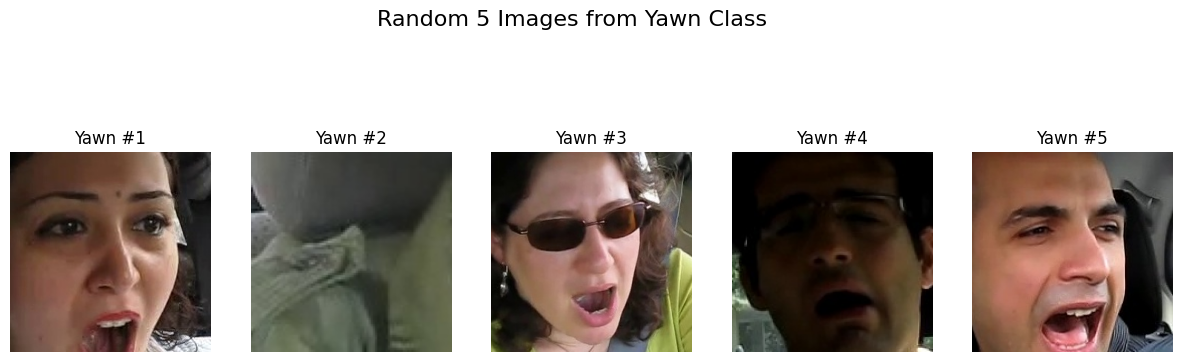

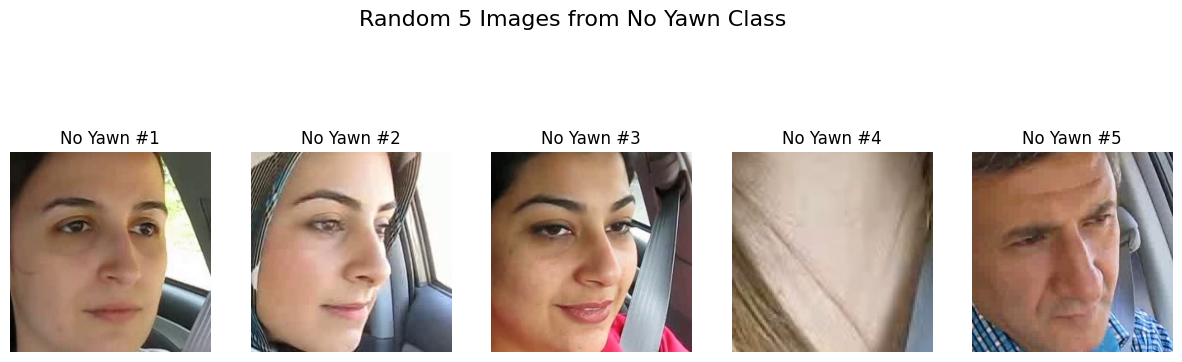

Number of images in 'yawnCrop': 421
All images in 'yawnCrop' have the same shape? No
Number of images in 'no_yawnCrop': 416
All images in 'no_yawnCrop' have the same shape? No


In [92]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Paths to cropped image folders in /kaggle/working
yawn_crop_dir = '/kaggle/working/train_cropped/yawnCrop'
no_yawn_crop_dir = '/kaggle/working/train_cropped/no_yawnCrop'



# Show 5 random images from each class
show_random_images(yawn_crop_dir, 'Yawn')
show_random_images(no_yawn_crop_dir, 'No Yawn')



# Folder paths
yawn_crop_dir = '/kaggle/working/train_cropped/yawnCrop'
no_yawn_crop_dir = '/kaggle/working/train_cropped/no_yawnCrop'

# Count images and check shape consistency
print(f"Number of images in '{os.path.basename(yawn_crop_dir)}': {len(os.listdir(yawn_crop_dir))}")
check_same_shape(yawn_crop_dir)

print(f"Number of images in '{os.path.basename(no_yawn_crop_dir)}': {len(os.listdir(no_yawn_crop_dir))}")
check_same_shape(no_yawn_crop_dir)



### **Method 3 MTCNN facenet pytorch BEST For Face Crop**

In [77]:
import os
from tqdm import tqdm
from PIL import Image
import cv2
from facenet_pytorch import MTCNN
import torch

def load_image_cv2_to_pil(image_path):
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        raise ValueError(f"Failed to load image {image_path} with cv2")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img_rgb)
    return pil_img

device = 'cuda' if torch.cuda.is_available() else 'cpu'
mtcnn = MTCNN(keep_all=False, device=device)

import numpy as np
import cv2

def crop_face_mtcnn_cv2(image_path, save_path):
    try:
        img = load_image_cv2_to_pil(image_path)
    except Exception as e:
        print(f"Skipping corrupted/unreadable image: {image_path}. Error: {e}")
        return False

    boxes, _ = mtcnn.detect(img)
    if boxes is None:
        print(f"No face detected in {image_path}")
        return False

    box = boxes[0]
    width, height = img.size

    left = max(int(box[0]), 0)
    top = max(int(box[1]), 0)
    right = min(int(box[2]), width)
    bottom = min(int(box[3]), height)

    if right <= left or bottom <= top:
        print(f"Invalid bounding box for {image_path}, skipping.")
        return False

    face_img = img.crop((left, top, right, bottom))

    # Convert PIL Image to OpenCV format for saving
    face_np = np.array(face_img)          # RGB format
    face_bgr = cv2.cvtColor(face_np, cv2.COLOR_RGB2BGR)

    # Save with OpenCV
    success = cv2.imwrite(save_path, face_bgr)
    if not success:
        print(f"Failed to save cropped image: {save_path}")
        return False

    return True



def process_folder_mtcnn_cv2(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    filenames = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    for filename in tqdm(filenames, desc=f"Processing {os.path.basename(input_folder)}"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        crop_face_mtcnn_cv2(input_path, output_path)

data_dir = '/kaggle/input/yawdd-cwe-glasses/yawdd,cwe,glasses-dataset/train'
yawn_dir = os.path.join(data_dir, 'yawn')
no_yawn_dir = os.path.join(data_dir, 'no_yawn')

output_base = '/kaggle/working/train_cropped_mtcnn'
yawn_crop_dir = os.path.join(output_base, 'yawnCrop')
no_yawn_crop_dir = os.path.join(output_base, 'no_yawnCrop')

process_folder_mtcnn_cv2(yawn_dir, yawn_crop_dir)
process_folder_mtcnn_cv2(no_yawn_dir, no_yawn_crop_dir)


Processing no_yawn: 100%|██████████| 725/725 [00:27<00:00, 26.19it/s]


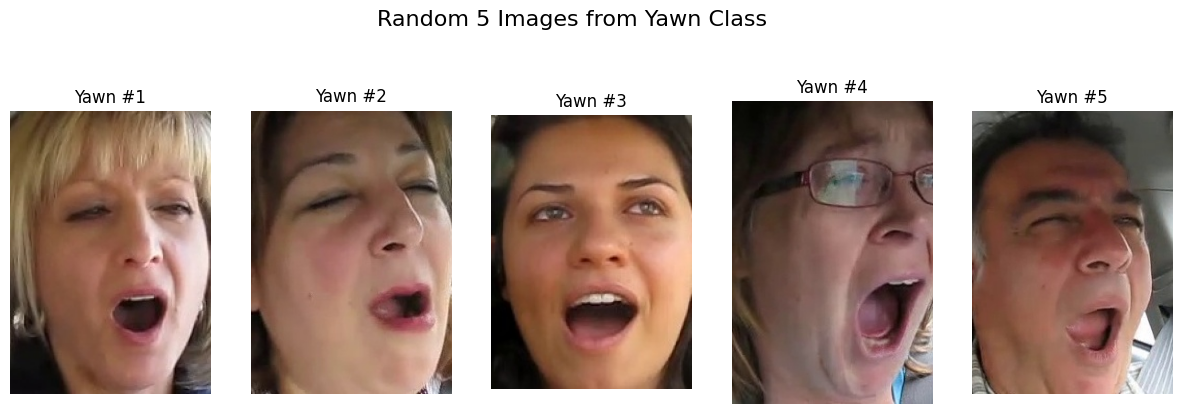

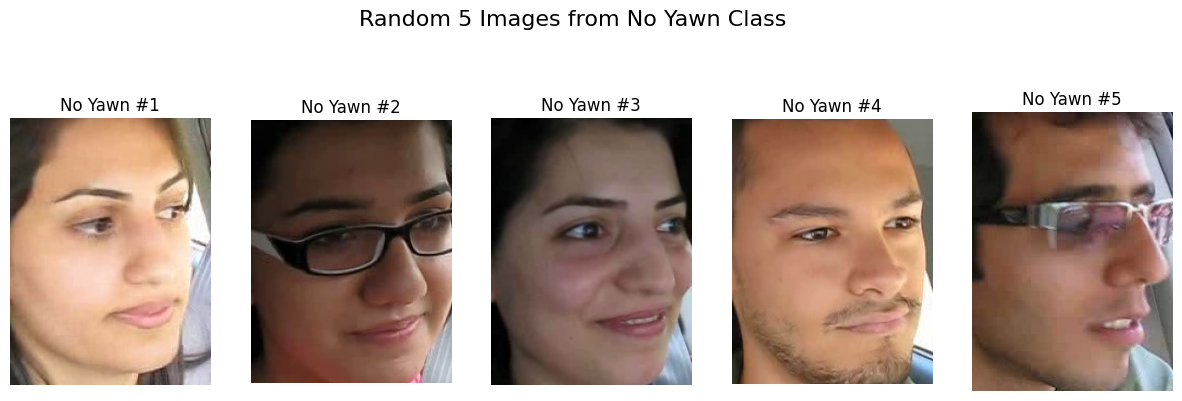

Number of images in 'yawnCrop': 723
All images in 'yawnCrop' have the same shape? No
Number of images in 'no_yawnCrop': 725
All images in 'no_yawnCrop' have the same shape? No


In [93]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Paths to cropped image folders in /kaggle/working
yawn_crop_dir = '/kaggle/working/train_cropped_mtcnn/yawnCrop'
no_yawn_crop_dir = '/kaggle/working/train_cropped_mtcnn/no_yawnCrop'


# Show 5 random images from each class
show_random_images(yawn_crop_dir, 'Yawn')
show_random_images(no_yawn_crop_dir, 'No Yawn')



# Folder paths
yawn_crop_dir = '/kaggle/working/train_cropped_mtcnn/yawnCrop'
no_yawn_crop_dir = '/kaggle/working/train_cropped_mtcnn/no_yawnCrop'

# Count images and check shape consistency
print(f"Number of images in '{os.path.basename(yawn_crop_dir)}': {len(os.listdir(yawn_crop_dir))}")
check_same_shape(yawn_crop_dir)

print(f"Number of images in '{os.path.basename(no_yawn_crop_dir)}': {len(os.listdir(no_yawn_crop_dir))}")
check_same_shape(no_yawn_crop_dir)


# This Method works perfectly 


In [94]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import seaborn as sns
import pathlib

# -------------------------
# User config / hyperparams
# -------------------------
data_dir = '/kaggle/working/train_cropped_mtcnn'  # CHANGE if needed
TARGET_CLASSES = ['yawnCrop', 'no_yawnCrop']
IMG_SIZE = (224, 224)        # fixed size for both custom and transfer models
BATCH_SIZE = 32
SEED = 42
EPOCHS_CUSTOM = 50
EPOCHS_TL = 20
LEARNING_RATE = 1e-3


In [95]:
# -------------------------
# Verify dataset & counts
# -------------------------
for c in TARGET_CLASSES:
    p = os.path.join(data_dir, c)
    if not os.path.isdir(p):
        raise FileNotFoundError(f"Expected directory for class '{c}' at: {p}")
    count = len([f for f in os.listdir(p) if os.path.isfile(os.path.join(p, f))])
    print(f"Class '{c}': {count} images")



Class 'yawnCrop': 723 images
Class 'no_yawnCrop': 725 images


Found 1448 files belonging to 2 classes.
Using 1014 files for training.


I0000 00:00:1759262881.953792      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13740 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759262881.954604      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 1448 files belonging to 2 classes.
Using 434 files for validation.
Class names (inferred): ['yawnCrop', 'no_yawnCrop']

Dataset sizes (batches):
Train: 32
Val: 7
Test: 7


/tmp/ipykernel_36/954708821.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(labels[i].numpy())  # float→int


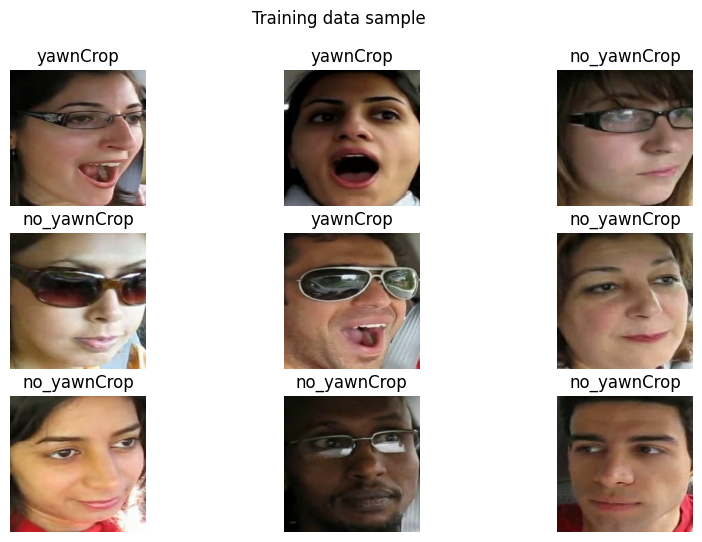

In [96]:
# 1. Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="binary",
    class_names=["yawnCrop", "no_yawnCrop"],
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.3,   # 70% train, 30% val+test
    subset="training",
    seed=SEED
)

val_test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="binary",
    class_names=["yawnCrop", "no_yawnCrop"],
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.3,
    subset="validation",
    seed=SEED
)

# 2. Save class names BEFORE caching/prefetch
class_names = train_ds.class_names
print("Class names (inferred):", class_names)

# 3. Split val_test_ds into val/test
val_batches = int(0.5 * tf.data.experimental.cardinality(val_test_ds).numpy())
val_ds = val_test_ds.take(val_batches)
test_ds = val_test_ds.skip(val_batches)

print("\nDataset sizes (batches):")
print("Train:", tf.data.experimental.cardinality(train_ds).numpy())
print("Val:", tf.data.experimental.cardinality(val_ds).numpy())
print("Test:", tf.data.experimental.cardinality(test_ds).numpy())

# 4. Now apply cache/prefetch (after saving class_names)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# -------------------------
# Optional: visualize some samples
# -------------------------
def show_batch(dataset, title="Sample images"):
    plt.figure(figsize=(10, 6))
    for images, labels in dataset.take(1):
        for i in range(min(9, images.shape[0])):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            label = int(labels[i].numpy())  # float→int
            plt.title(class_names[label])
            plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_batch(train_ds, "Training data sample")


### **Check for Class Imbalance**

In [97]:
# 1. Check distribution of labels
def count_labels(dataset):
    counts = {0: 0, 1: 0}
    for _, labels in dataset.unbatch():
        lbl = int(labels.numpy())
        counts[lbl] += 1
    return counts

print("Train label distribution:", count_labels(train_ds))
print("Val label distribution:", count_labels(val_ds))
print("Test label distribution:", count_labels(test_ds))


/tmp/ipykernel_36/1358632873.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lbl = int(labels.numpy())


Train label distribution: {0: 518, 1: 496}
Val label distribution: {0: 111, 1: 113}
Test label distribution: {0: 94, 1: 116}


In [98]:
# 2. Compute Class weight 

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Collect all training labels
train_labels = []
for _, labels in train_ds.unbatch():
    train_labels.append(int(labels.numpy()))
train_labels = np.array(train_labels)

# Compute weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


/tmp/ipykernel_36/1445992484.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_labels.append(int(labels.numpy()))


Class Weights: {0: 0.9787644787644788, 1: 1.0221774193548387}


In [99]:
# -------------------------
# Data augmentation + preprocessing layers
# -------------------------
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.08),
    layers.RandomZoom(0.08),
    layers.RandomContrast(0.06),
], name="data_augmentation")

# Normalization layer (rescale pixels 0-1)
rescale = layers.Rescaling(1./255)

In [100]:
# -------------------------
# Build Custom CNN (from scratch)  --> (3,) is for 3 channels
# GlobalAveragePooling2D() and GlobalMaxPooling2D() convert 2D feature maps into 1D feature vectors, so no need of flattern layer .
# -------------------------

def build_custom_cnn(input_shape=IMG_SIZE + (3,)):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = rescale(x)
    # Conv block 1
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)
    # Conv block 2
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)
    # Conv block 3
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # binary
    model = keras.Model(inputs, outputs, name='custom_cnn')
    return model

In [101]:
custom_model = build_custom_cnn()
custom_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
custom_model.summary()

Model: "custom_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,785 (432.75 KB)

 Trainable params: 110,337 (431.00 KB)

 Non-trainable params: 448 (1.75 KB)

In [102]:
# print(train_ds.shape)
print(type(train_ds))
print(train_ds)

# print(val_ds.shape)
print(type(val_ds))
print(val_ds)

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


In [103]:

# -------------------------
# Train the Custom CNN
# -------------------------
callbacks = [
    keras.callbacks.ModelCheckpoint("custom_cnn_best.h5", save_best_only=True, monitor='val_accuracy'),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history_custom = custom_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_CUSTOM,
    callbacks=callbacks
)

Epoch 1/50


I0000 00:00:1759262932.060781     289 cuda_dnn.cc:529] Loaded cuDNN version 90300


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.6150 - loss: 0.6377 - val_accuracy: 0.5045 - val_loss: 0.7131
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.6846 - loss: 0.5615 - val_accuracy: 0.5045 - val_loss: 0.8184
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.7086 - loss: 0.5244 - val_accuracy: 0.5045 - val_loss: 1.1760
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.7433 - loss: 0.5047 - val_accuracy: 0.5045 - val_loss: 1.6733
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.7716 - loss: 0.4611 - val_accuracy: 0.5045 - val_loss: 2.3943
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8340 - loss: 0.3764 - val_accuracy: 0.5045 - val_loss: 2.9433


In [104]:
import sys
print(sys.version)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [105]:
# Build y_true and y_pred arrays for confusion matrix & classification report
def get_labels_and_predictions(model, dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset.unbatch().batch(256):  # manageable chunks
        preds = model.predict(images, verbose=0).ravel()
        y_pred.extend((preds >= 0.5).astype(int).tolist())
        y_true.extend(labels.numpy().astype(int).tolist())
    return np.array(y_true), np.array(y_pred)


# Plot training curves for custom model
def plot_history(history, title_prefix=""):
    history_dict = history.history
    epochs_range = range(1, len(history_dict['loss']) + 1)

    plt.figure(figsize=(12, 4))
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history_dict['loss'], label='train_loss')
    plt.plot(epochs_range, history_dict['val_loss'], label='val_loss')
    plt.title(f'{title_prefix} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history_dict['accuracy'], label='train_acc')
    plt.plot(epochs_range, history_dict['val_accuracy'], label='val_acc')
    plt.title(f'{title_prefix} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5504 - loss: 0.6955

Custom CNN Test Loss: 0.6944, Test Accuracy: 0.5524

Custom CNN - Classification Report:

              precision    recall  f1-score   support

    yawnCrop       0.00      0.00      0.00        94
 no_yawnCrop       0.55      1.00      0.71       116

    accuracy                           0.55       210
   macro avg       0.28      0.50      0.36       210
weighted avg       0.31      0.55      0.39       210



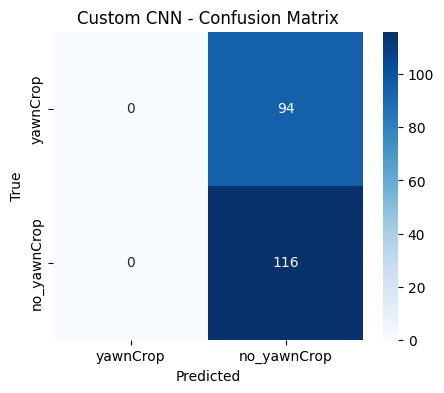

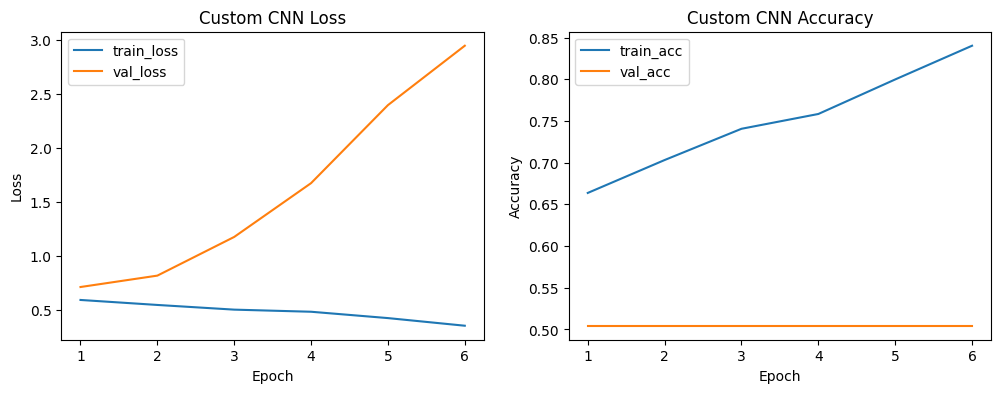

In [106]:
# -------------------------
# Evaluate on test set & metrics (Custom CNN)
# -------------------------
test_loss, test_acc = custom_model.evaluate(test_ds)
print(f"\nCustom CNN Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")



y_true_c, y_pred_c = get_labels_and_predictions(custom_model, test_ds)

# Confusion matrix & classification report
cm_c = confusion_matrix(y_true_c, y_pred_c)
print("\nCustom CNN - Classification Report:\n")
print(classification_report(y_true_c, y_pred_c, target_names=class_names,zero_division=0))



# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Custom CNN - Confusion Matrix')
plt.show()

plot_history(history_custom, title_prefix="Custom CNN")

In [107]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras

# ✅ Grad-CAM heatmap function for custom CNN
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute gradients
    grads = tape.gradient(class_channel, conv_outputs)

    # Compute pooled grads
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight conv outputs with grads
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# ✅ Overlay heatmap on image
def overlay_gradcam(img, heatmap, alpha=0.4, colormap=cv2.COLORMAP_JET):
    # Ensure image is uint8
    if img.dtype != np.uint8:
        img = np.uint8(255 * img / np.max(img))

    # Resize heatmap to match input image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convert heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)  # convert from BGR → RGB

    # Overlay heatmap on image
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)
    return superimposed_img


def show_gradcam_samples(dataset, class_names, model, last_conv_layer_name, num_images=3):
    plt.figure(figsize=(12, 6))
    count = 0
    for images, labels in dataset.take(1):  # take 1 batch
        for i in range(min(num_images, images.shape[0])):
            img = images[i].numpy().astype("uint8")
            label = int(labels[i].numpy())  # ✅ cast to int

            img_array = np.expand_dims(images[i], axis=0)
            heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
            superimposed_img = overlay_gradcam(img, heatmap)

            # Show original
            plt.subplot(2, num_images, i + 1)
            plt.imshow(img)
            plt.title(f"True: {class_names[label]}")
            plt.axis("off")

            # Show GradCAM
            plt.subplot(2, num_images, i + 1 + num_images)
            plt.imshow(superimposed_img)
            plt.title("GradCAM")
            plt.axis("off")

            count += 1
        break  # only take one batch
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_36/1847319493.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(labels[i].numpy())  # ✅ cast to int
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


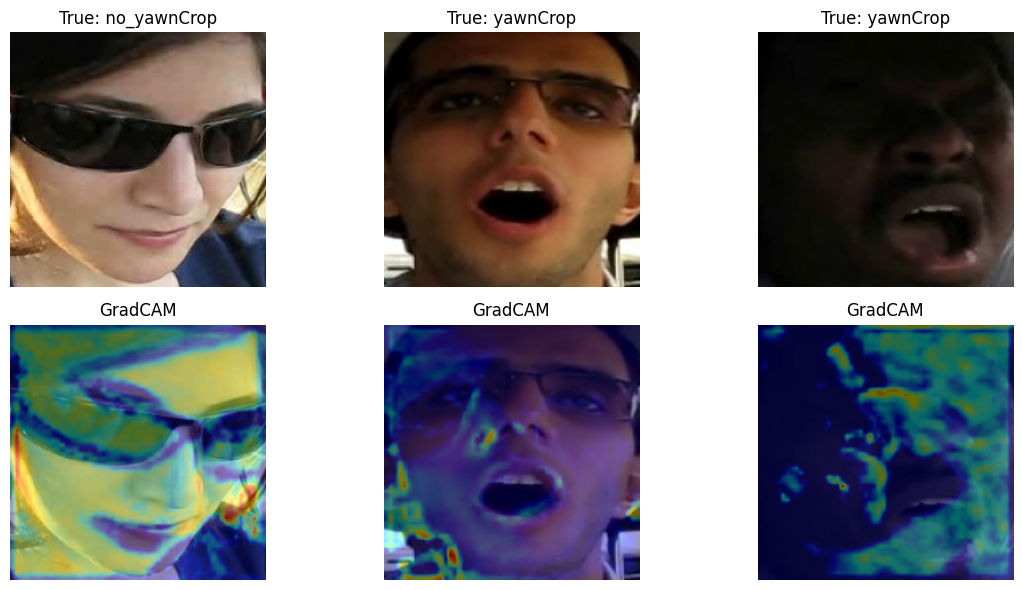

In [108]:
last_conv_layer_name = "conv2d_2"  # adjust if different in summary
show_gradcam_samples(test_ds, class_names, custom_model, last_conv_layer_name)


## **CNN V2 with modification**

In [127]:
def build_improved_cnn(input_shape=IMG_SIZE + (3,)):
    inputs = keras.Input(shape=input_shape)
    
    # Data Augmentation + Normalization
    x = data_augmentation(inputs)
    x = rescale(x)

    #  Conv Block 1
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    #  Conv Block 2
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    #  Conv Block 3
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    #  Conv Block 4 (new, deeper features)
    x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    #  Global Pooling (combine Avg + Max pooling)
    gap = layers.GlobalAveragePooling2D()(x)
    gmp = layers.GlobalMaxPooling2D()(x)
    x = layers.Concatenate()([gap, gmp])  

    #  Dense layers
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.25)(x)  # reduced dropout

    outputs = layers.Dense(1, activation='sigmoid')(x)  # binary classification
    model = keras.Model(inputs, outputs, name='improved_cnn')
    return model

In [149]:
improved_model = build_improved_cnn()
improved_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),  # slightly lower lr
    loss='binary_crossentropy',
    metrics=['accuracy']
)

improved_model.summary()


Model: "improved_cnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 224, 224,  │          0 │ input_layer_13[0… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ data_augmentatio… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 224, 224,  │        896 │ rescaling[12][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        128 │ conv2d_47[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_47    │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 112, 112,  │     18,496 │ max_pooling2d_47… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_48[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_48    │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 56, 56,    │     73,856 │ max_pooling2d_48… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_49[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_49    │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 28, 28,    │    295,168 │ max_pooling2d_49… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │      1,024 │ conv2d_50[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_50    │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ max_pooling2d_50… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ max_pooling2d_50

 Total params: 521,921 (1.99 MB)

 Trainable params: 520,961 (1.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [150]:
#  Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint("improved_cnn_best.h5", save_best_only=True, monitor='val_accuracy'),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)
]

# Train
history_improved = improved_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_CUSTOM,
    callbacks=callbacks
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.5321 - loss: 6.3300 - val_accuracy: 0.5045 - val_loss: 3.9768 - learning_rate: 0.0100
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.5684 - loss: 0.7328 - val_accuracy: 0.5045 - val_loss: 1.1355 - learning_rate: 0.0100
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.6218 - loss: 0.6436 - val_accuracy: 0.5045 - val_loss: 0.9213 - learning_rate: 0.0100
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.6346 - loss: 0.6418 - val_accuracy: 0.5045 - val_loss: 0.8375 - learning_rate: 0.0100
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.6299 - loss: 0.6234 - val_accuracy: 0.5045 - val_loss: 0.7769 - learning_rate: 0.0100
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.6309 - loss: 0.5952 - val_accuracy: 0.5045 - val_loss: 2.0116 - learning_rate: 0.0100
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.7418 - loss: 0.5014 -

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9906 - loss: 0.0258

Custom CNN Test Loss: 0.0297, Test Accuracy: 0.9857

Custom CNN - Classification Report:

              precision    recall  f1-score   support

    yawnCrop       0.99      0.98      0.98        94
 no_yawnCrop       0.98      0.99      0.99       116

    accuracy                           0.99       210
   macro avg       0.99      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210



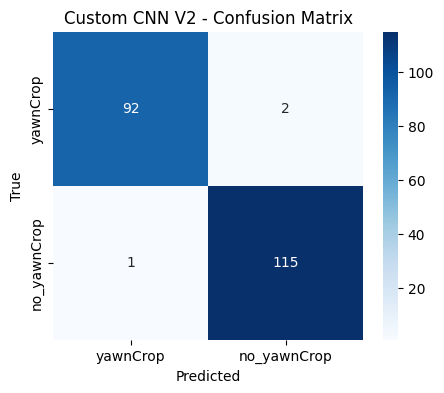

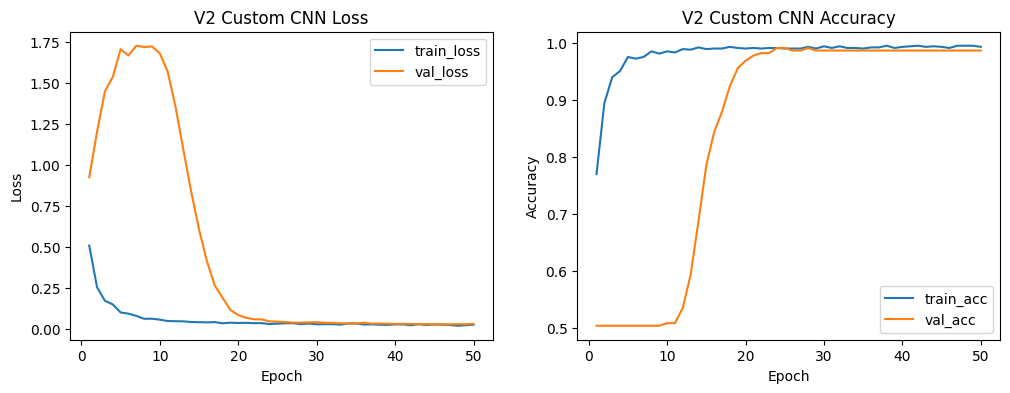

In [132]:
# -------------------------
# Evaluate on test set & metrics (Custom CNN)
# -------------------------
test_loss, test_acc = improved_model.evaluate(test_ds)
print(f"\nCustom CNN Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")



y_true_c, y_pred_c = get_labels_and_predictions(improved_model, test_ds)

# Confusion matrix & classification report
cm_c = confusion_matrix(y_true_c, y_pred_c)
print("\nCustom CNN - Classification Report:\n")
print(classification_report(y_true_c, y_pred_c, target_names=class_names,zero_division=0))



# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Custom CNN V2 - Confusion Matrix')
plt.show()

plot_history(history_improved, title_prefix="V2 Custom CNN")


# This is for LR 1e-3 and patience 17 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7203 - loss: 0.5910

Custom CNN Test Loss: 0.5743, Test Accuracy: 0.7381

Custom CNN - Classification Report:

              precision    recall  f1-score   support

    yawnCrop       0.70      0.73      0.72        94
 no_yawnCrop       0.77      0.74      0.76       116

    accuracy                           0.74       210
   macro avg       0.74      0.74      0.74       210
weighted avg       0.74      0.74      0.74       210



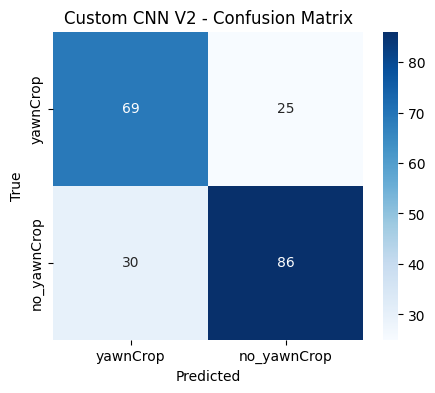

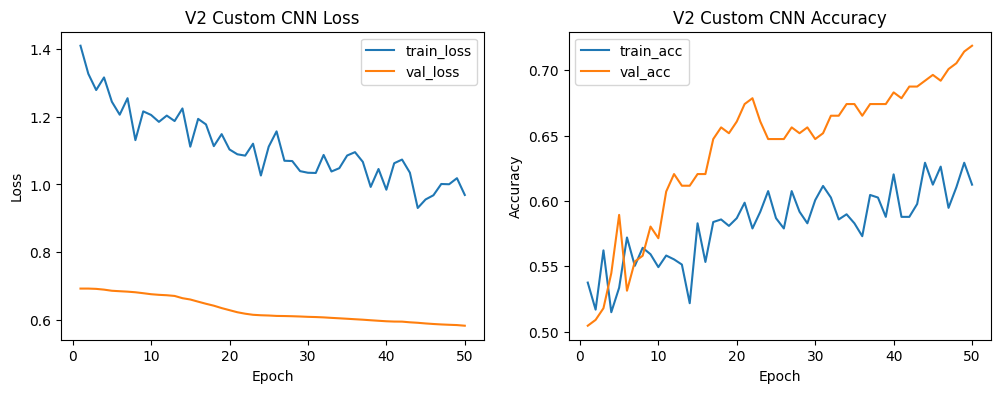

In [142]:
# -------------------------
# Evaluate on test set & metrics (Custom CNN)
# -------------------------
test_loss, test_acc = improved_model.evaluate(test_ds)
print(f"\nCustom CNN Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")



y_true_c, y_pred_c = get_labels_and_predictions(improved_model, test_ds)

# Confusion matrix & classification report
cm_c = confusion_matrix(y_true_c, y_pred_c)
print("\nCustom CNN - Classification Report:\n")
print(classification_report(y_true_c, y_pred_c, target_names=class_names,zero_division=0))



# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Custom CNN V2 - Confusion Matrix')
plt.show()

plot_history(history_improved, title_prefix="V2 Custom CNN")


# This is for LR 1e-5 and patience 15

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9824 - loss: 0.1002

Custom CNN Test Loss: 0.0525, Test Accuracy: 0.9905

Custom CNN - Classification Report:

              precision    recall  f1-score   support

    yawnCrop       0.99      0.99      0.99        94
 no_yawnCrop       0.99      0.99      0.99       116

    accuracy                           0.99       210
   macro avg       0.99      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210



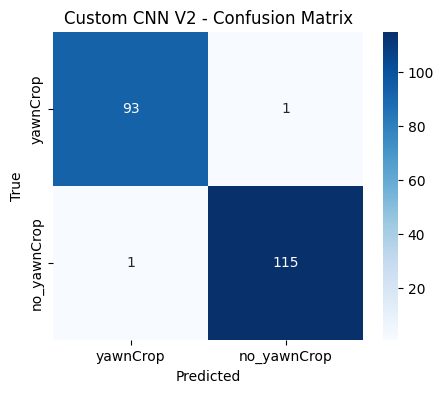

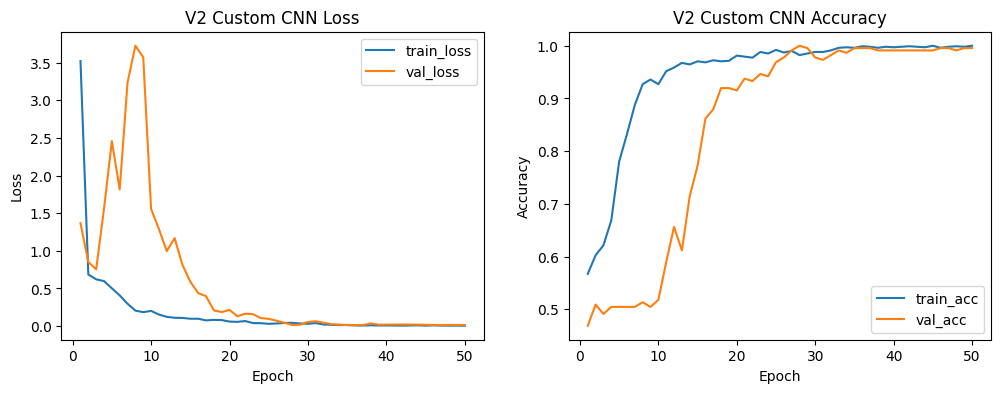

In [148]:
# -------------------------
# Evaluate on test set & metrics (Custom CNN)
# -------------------------
test_loss, test_acc = improved_model.evaluate(test_ds)
print(f"\nCustom CNN Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")



y_true_c, y_pred_c = get_labels_and_predictions(improved_model, test_ds)

# Confusion matrix & classification report
cm_c = confusion_matrix(y_true_c, y_pred_c)
print("\nCustom CNN - Classification Report:\n")
print(classification_report(y_true_c, y_pred_c, target_names=class_names,zero_division=0))



# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Custom CNN V2 - Confusion Matrix')
plt.show()

plot_history(history_improved, title_prefix="V2 Custom CNN")


# This is for LR 1e-2 and patience 15

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9874 - loss: 0.0826

Custom CNN Test Loss: 0.0492, Test Accuracy: 0.9905

Custom CNN - Classification Report:

              precision    recall  f1-score   support

    yawnCrop       1.00      0.98      0.99        94
 no_yawnCrop       0.98      1.00      0.99       116

    accuracy                           0.99       210
   macro avg       0.99      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210



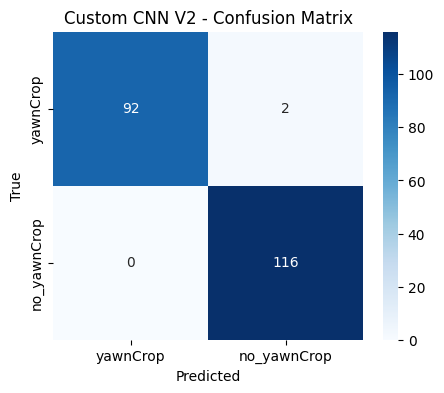

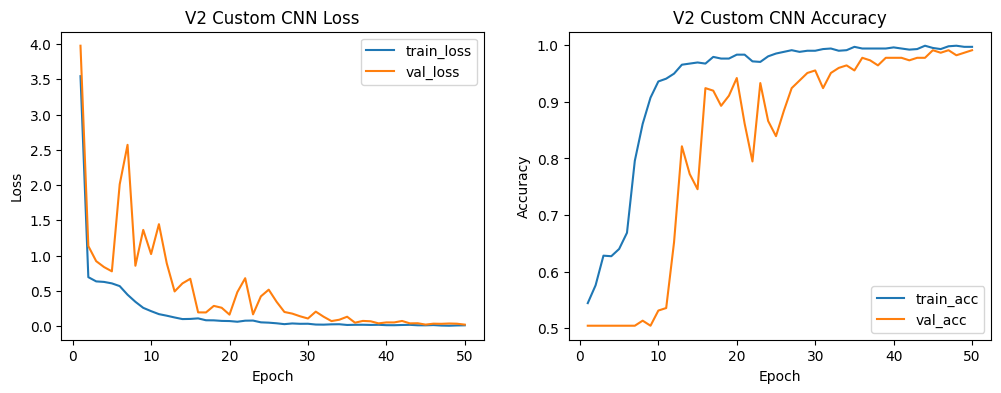

In [151]:
# -------------------------
# Evaluate on test set & metrics (Custom CNN)
# -------------------------
test_loss, test_acc = improved_model.evaluate(test_ds)
print(f"\nCustom CNN Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")



y_true_c, y_pred_c = get_labels_and_predictions(improved_model, test_ds)

# Confusion matrix & classification report
cm_c = confusion_matrix(y_true_c, y_pred_c)
print("\nCustom CNN - Classification Report:\n")
print(classification_report(y_true_c, y_pred_c, target_names=class_names,zero_division=0))



# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Custom CNN V2 - Confusion Matrix')
plt.show()

plot_history(history_improved, title_prefix="V2 Custom CNN")


# This is for LR 1e-2 and patience 9 

### **USE EAR & MAR and USE ML MODEL on image**

In [6]:
import os
import cv2
import dlib
import numpy as np
from scipy.spatial import distance as dist
from imutils import face_utils
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Paths ---
base_dir = '/kaggle/working/train_cropped_mtcnn'
pos_dir = os.path.join(base_dir, 'yawnCrop')
neg_dir = os.path.join(base_dir, 'no_yawnCrop')


import os

def count_images(folder_path):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
    return len([f for f in os.listdir(folder_path) if f.lower().endswith(valid_extensions)])

pos_dir = os.path.join(base_dir, 'yawnCrop')
neg_dir = os.path.join(base_dir, 'no_yawnCrop')

num_pos_images = count_images(pos_dir)
num_neg_images = count_images(neg_dir)

print(f"Number of images in yawnCrop: {num_pos_images}")
print(f"Number of images in no_yawnCrop: {num_neg_images}")



Number of images in yawnCrop: 723
Number of images in no_yawnCrop: 725


In [6]:

# --- 2. Load dlib models ---
detector = dlib.get_frontal_face_detector()
# Change the path to where you placed the .dat file
predictor_path = '/kaggle/input/dat-data/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(predictor_path)

# --- 3. EAR / MAR functions ---
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

def mouth_aspect_ratio(mouth):
    A = dist.euclidean(mouth[2], mouth[10])
    B = dist.euclidean(mouth[4], mouth[8])
    C = dist.euclidean(mouth[0], mouth[6])
    mar = (A + B) / (2.0 * C)
    return mar




In [7]:
# --- 4. Feature extraction ---
def extract_features_from_image(img_path):
    """
    Returns (ear, mar) or None if landmarks / face not found.
    """
    img = cv2.imread(img_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray, 1)
    if len(faces) == 0:
        return None

    # For simplicity use the first face
    face = faces[0]
    shape = predictor(gray, face)
    shape = face_utils.shape_to_np(shape)  # (68,2)

    # landmarks for eyes
    (l_start, l_end) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]  # (42, 48)
    (r_start, r_end) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
    left_eye = shape[l_start:l_end]
    right_eye = shape[r_start:r_end]

    # landmarks for mouth
    (m_start, m_end) = face_utils.FACIAL_LANDMARKS_IDXS["mouth"]  # (48, 68)
    mouth = shape[m_start:m_end]

    # compute EAR
    left_ear = eye_aspect_ratio(left_eye)
    right_ear = eye_aspect_ratio(right_eye)
    ear = (left_ear + right_ear) / 2.0

    # compute MAR
    mar = mouth_aspect_ratio(mouth)

    return ear, mar

In [8]:

def build_dataset(pos_dir, neg_dir):
    features = []
    labels = []
    # positive (yawn) = 1
    for fname in os.listdir(pos_dir):
        if not fname.lower().endswith(('.jpg','png','jpeg')):
            continue
        path = os.path.join(pos_dir, fname)
        feat = extract_features_from_image(path)
        if feat is not None:
            features.append(feat)
            labels.append(1)
    # negative (no_yawn) = 0
    for fname in os.listdir(neg_dir):
        if not fname.lower().endswith(('.jpg','png','jpeg')):
            continue
        path = os.path.join(neg_dir, fname)
        feat = extract_features_from_image(path)
        if feat is not None:
            features.append(feat)
            labels.append(0)

    return np.array(features), np.array(labels)



In [9]:
# Extract data
X, y = build_dataset(pos_dir, neg_dir)
print("Feature array shape:", X.shape, "Labels shape:", y.shape)

# Some sanity check
if X.shape[0] == 0:
    raise ValueError("No valid EAR/MAR features found — maybe landmark detection failed on all images.")


# lots of images skips due to bad light conditions

Feature array shape: (421, 2) Labels shape: (421,)


In [10]:
counts = np.bincount(y)
print("Count of 0s:", counts[0])
print("Count of 1s:", counts[1])

Count of 0s: 170
Count of 1s: 251


In [11]:

# --- 5. Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(421, 2) (336, 2) (85, 2)
(421,) (336,) (85,)


In [12]:
# --- 6. Train a simple model (RandomForest) ---
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [13]:
# --- 7. Evaluate ---
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.98      0.96      0.97        51

    accuracy                           0.96        85
   macro avg       0.96      0.97      0.96        85
weighted avg       0.97      0.96      0.96        85

Confusion Matrix:
 [[33  1]
 [ 2 49]]


In [162]:
import dlib
import cv2
import numpy as np

# EAR calculation helper
def eye_aspect_ratio(eye):
    # eye is 6 points (x, y)
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])
    C = np.linalg.norm(eye[0] - eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

# MAR calculation helper
def mouth_aspect_ratio(mouth):
    A = np.linalg.norm(mouth[13] - mouth[19])  # 14-20 in 1-based indexing
    B = np.linalg.norm(mouth[14] - mouth[18])  # 15-19
    C = np.linalg.norm(mouth[15] - mouth[17])  # 16-18
    D = np.linalg.norm(mouth[12] - mouth[16])  # 13-17
    mar = (A + B + C) / (2.0 * D)
    return mar

# Initialize dlib's face detector and landmark predictor globally to avoid re-loading
detector = dlib.get_frontal_face_detector()
predictor_path = '/kaggle/input/dat-data/shape_predictor_68_face_landmarks.dat'  # Update this path
predictor = dlib.shape_predictor(predictor_path)

def extract_features_from_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: Unable to read image {image_path}")
            return None
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 1)

        if len(rects) == 0:
            print(f"No face detected in {image_path}")
            return None

        # Use first detected face only
        rect = rects[0]
        shape = predictor(gray, rect)
        shape_np = np.zeros((68, 2), dtype='int')

        for i in range(68):
            shape_np[i] = (shape.part(i).x, shape.part(i).y)

        # Extract eye and mouth landmarks (0-based indexing)
        left_eye = shape_np[42:48]  # points 42-47
        right_eye = shape_np[36:42]  # points 36-41
        mouth = shape_np[48:68]  # points 48-67

        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        ear = (left_ear + right_ear) / 2.0
        mar = mouth_aspect_ratio(mouth)

        return [ear, mar]

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None


import os
import numpy as np

def build_dataset(pos_dir, neg_dir):
    features = []
    labels = []
    fail_count = 0
    
    for folder, label in [(pos_dir, 1), (neg_dir, 0)]:
        for fname in os.listdir(folder):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            path = os.path.join(folder, fname)
            feat = extract_features_from_image(path)
            if feat is not None:
                features.append(feat)
                labels.append(label)
            else:
                fail_count += 1
                print(f"Failed to extract features from {path}")

    print(f"Feature extraction failed on {fail_count} images")
    return np.array(features), np.array(labels)


In [163]:
# Extract data
X, y = build_dataset(pos_dir, neg_dir)
print("Feature array shape:", X.shape, "Labels shape:", y.shape)

# Some sanity check
if X.shape[0] == 0:
    raise ValueError("No valid EAR/MAR features found — maybe landmark detection failed on all images.")



No face detected in /kaggle/working/train_cropped_mtcnn/yawnCrop/514.jpg
Failed to extract features from /kaggle/working/train_cropped_mtcnn/yawnCrop/514.jpg
No face detected in /kaggle/working/train_cropped_mtcnn/yawnCrop/350.jpg
Failed to extract features from /kaggle/working/train_cropped_mtcnn/yawnCrop/350.jpg
No face detected in /kaggle/working/train_cropped_mtcnn/yawnCrop/418.jpg
Failed to extract features from /kaggle/working/train_cropped_mtcnn/yawnCrop/418.jpg
No face detected in /kaggle/working/train_cropped_mtcnn/yawnCrop/467.jpg
Failed to extract features from /kaggle/working/train_cropped_mtcnn/yawnCrop/467.jpg
No face detected in /kaggle/working/train_cropped_mtcnn/yawnCrop/121.jpg
Failed to extract features from /kaggle/working/train_cropped_mtcnn/yawnCrop/121.jpg
No face detected in /kaggle/working/train_cropped_mtcnn/yawnCrop/608.jpg
Failed to extract features from /kaggle/working/train_cropped_mtcnn/yawnCrop/608.jpg
No face detected in /kaggle/working/train_cropped_mt

In [165]:
# See Counts of images 


def extract_features_from_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return "unreadable"
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 1)
        if len(rects) == 0:
            return "no_face"

        rect = rects[0]
        shape = predictor(gray, rect)
        shape_np = np.zeros((68, 2), dtype='int')
        for i in range(68):
            shape_np[i] = (shape.part(i).x, shape.part(i).y)

        left_eye = shape_np[42:48]
        right_eye = shape_np[36:42]
        mouth = shape_np[48:68]

        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        ear = (left_ear + right_ear) / 2.0
        mar = mouth_aspect_ratio(mouth)

        return [ear, mar]

    except Exception:
        return "error"

def build_dataset(pos_dir, neg_dir):
    features = []
    labels = []
    counters = {"no_face": 0, "unreadable": 0, "error": 0, "success": 0}

    for folder, label in [(pos_dir, 1), (neg_dir, 0)]:
        for fname in os.listdir(folder):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            path = os.path.join(folder, fname)
            feat = extract_features_from_image(path)
            if isinstance(feat, list):
                features.append(feat)
                labels.append(label)
                counters["success"] += 1
            else:
                counters[feat] += 1

    print(f"Summary of feature extraction:")
    print(f"  Successful: {counters['success']}")
    print(f"  No face detected: {counters['no_face']}")
    print(f"  Unreadable images: {counters['unreadable']}")
    print(f"  Other errors: {counters['error']}")

    return np.array(features), np.array(labels)


In [166]:
# Extract data
X, y = build_dataset(pos_dir, neg_dir)
print("Feature array shape:", X.shape, "Labels shape:", y.shape)

# Some sanity check
if X.shape[0] == 0:
    raise ValueError("No valid EAR/MAR features found — maybe landmark detection failed on all images.")


Summary of feature extraction:
  Successful: 421
  No face detected: 1027
  Unreadable images: 0
  Other errors: 0
Feature array shape: (421, 2) Labels shape: (421,)


In [7]:
import cv2
import dlib
import numpy as np
import os

# EAR helper
def eye_aspect_ratio(eye):
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])
    C = np.linalg.norm(eye[0] - eye[3])
    return (A + B) / (2.0 * C)

# MAR helper
def mouth_aspect_ratio(mouth):
    A = np.linalg.norm(mouth[13] - mouth[19])
    B = np.linalg.norm(mouth[14] - mouth[18])
    C = np.linalg.norm(mouth[15] - mouth[17])
    D = np.linalg.norm(mouth[12] - mouth[16])
    return (A + B + C) / (2.0 * D)

# Load dlib landmarks predictor
predictor_path = '/kaggle/input/dat-data/shape_predictor_68_face_landmarks.dat'  # Update path
predictor = dlib.shape_predictor(predictor_path)

# Load OpenCV DNN face detector (deploy prototxt + caffemodel from opencv github)
modelFile = "/kaggle/input/open-cv-dnn-files/deploy.prototxt"
weightsFile = "/kaggle/input/open-cv-dnn-files/res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNetFromCaffe(modelFile, weightsFile)

def preprocess_image(img, target_width=600):
    h, w = img.shape[:2]
    if w > target_width:
        scale = target_width / w
        img = cv2.resize(img, (target_width, int(h * scale)))
    return img

def detect_face_opencv_dnn(img):
    h, w = img.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0,
                                 (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()
    max_confidence = 0
    box = None

    # Find the detection with highest confidence > threshold
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5 and confidence > max_confidence:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            max_confidence = confidence

    if box is None:
        return None
    box = box.astype("int")
    (startX, startY, endX, endY) = box
    # Clamp coords to image size
    startX = max(0, startX)
    startY = max(0, startY)
    endX = min(w - 1, endX)
    endY = min(h - 1, endY)
    return (startX, startY, endX, endY)

def extract_features_from_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return "unreadable"

        img = preprocess_image(img, target_width=600)

        face_box = detect_face_opencv_dnn(img)
        if face_box is None:
            return "no_face"

        startX, startY, endX, endY = face_box
        face_img = img[startY:endY, startX:endX]
        gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

        rect = dlib.rectangle(0, 0, face_img.shape[1], face_img.shape[0])
        shape = predictor(gray, rect)

        shape_np = np.zeros((68, 2), dtype='int')
        for i in range(68):
            shape_np[i] = (shape.part(i).x, shape.part(i).y)

        left_eye = shape_np[42:48]
        right_eye = shape_np[36:42]
        mouth = shape_np[48:68]

        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        ear = (left_ear + right_ear) / 2.0
        mar = mouth_aspect_ratio(mouth)

        return [ear, mar]

    except Exception as e:
        return "error"

def build_dataset(pos_dir, neg_dir):
    features = []
    labels = []
    counters = {"no_face": 0, "unreadable": 0, "error": 0, "success": 0}

    for folder, label in [(pos_dir, 1), (neg_dir, 0)]:
        for fname in os.listdir(folder):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            path = os.path.join(folder, fname)
            feat = extract_features_from_image(path)
            if isinstance(feat, list):
                features.append(feat)
                labels.append(label)
                counters["success"] += 1
            else:
                counters[feat] += 1

    print(f"Summary of feature extraction:")
    print(f"  Successful: {counters['success']}")
    print(f"  No face detected: {counters['no_face']}")
    print(f"  Unreadable images: {counters['unreadable']}")
    print(f"  Other errors: {counters['error']}")

    return np.array(features), np.array(labels)


In [8]:
# Extract data
X, y = build_dataset(pos_dir, neg_dir)
print("Feature array shape:", X.shape, "Labels shape:", y.shape)

# Some sanity check
if X.shape[0] == 0:
    raise ValueError("No valid EAR/MAR features found — maybe landmark detection failed on all images.")


Summary of feature extraction:
  Successful: 1444
  No face detected: 4
  Unreadable images: 0
  Other errors: 0
Feature array shape: (1444, 2) Labels shape: (1444,)


In [16]:
counts = np.bincount(y)
print("Count of 0s:", counts[0])
print("Count of 1s:", counts[1])

Count of 0s: 724
Count of 1s: 720


In [9]:

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1444, 2) (866, 2) (578, 2)
(1444,) (866,) (578,)


In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# List of classifiers to try
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

for name, clf in classifiers.items():
    print(f"\n=== {name} ===")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



=== Logistic Regression ===
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.79       288
           1       0.83      0.67      0.74       290

    accuracy                           0.77       578
   macro avg       0.78      0.77      0.76       578
weighted avg       0.78      0.77      0.76       578

Confusion Matrix:
 [[248  40]
 [ 95 195]]

=== K-Nearest Neighbors ===
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76       288
           1       0.76      0.75      0.76       290

    accuracy                           0.76       578
   macro avg       0.76      0.76      0.76       578
weighted avg       0.76      0.76      0.76       578

Confusion Matrix:
 [[219  69]
 [ 72 218]]

=== Decision Tree ===
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       288


In [173]:
from sklearn.model_selection import train_test_split

test_sizes = [0.2, 0.3, 0.4, 0.5]

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

for ts in test_sizes:
    print(f"\n\n======= Test size = {ts} =======")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)
    
    print(f"Dataset shapes: X={X.shape}, X_train={X_train.shape}, X_test={X_test.shape}")
    print(f"               y={y.shape}, y_train={y_train.shape}, y_test={y_test.shape}")
    
    for name, clf in classifiers.items():
        print(f"\n--- Classifier: {name} ---")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




======= Test size = 0.2 =======
Dataset shapes: X=(1444, 2), X_train=(1155, 2), X_test=(289, 2)
               y=(1444,), y_train=(1155,), y_test=(289,)

--- Classifier: Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       145
           1       0.79      0.71      0.75       144

    accuracy                           0.76       289
   macro avg       0.76      0.76      0.76       289
weighted avg       0.76      0.76      0.76       289

Confusion Matrix:
 [[118  27]
 [ 42 102]]

--- Classifier: K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       145
           1       0.74      0.77      0.76       144

    accuracy                           0.75       289
   macro avg       0.75      0.75      0.75       289
weighted avg       0.75      0.75      0.75       289

Confusion Matrix:
 

### **MORE Features Than EAR and MAR**

In [22]:
def extract_features_from_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return "unreadable"

        img = preprocess_image(img, target_width=600)

        face_box = detect_face_opencv_dnn(img)
        if face_box is None:
            return "no_face"

        startX, startY, endX, endY = face_box
        face_img = img[startY:endY, startX:endX]
        gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

        rect = dlib.rectangle(0, 0, face_img.shape[1], face_img.shape[0])
        shape = predictor(gray, rect)

        shape_np = np.zeros((68, 2), dtype='double')  # use float for solvePnP
        for i in range(68):
            shape_np[i] = (shape.part(i).x, shape.part(i).y)

        left_eye = shape_np[42:48]
        right_eye = shape_np[36:42]
        mouth = shape_np[48:68]

        # EAR and MAR
        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        ear = (left_ear + right_ear) / 2.0
        mar = mouth_aspect_ratio(mouth)

        ### NEW FEATURE 1: Head Pose Estimation ###
        # 3D model points of standard landmarks
        model_points = np.array([
            (0.0, 0.0, 0.0),             # Nose tip
            (0.0, -330.0, -65.0),        # Chin
            (-225.0, 170.0, -135.0),     # Left eye left corner
            (225.0, 170.0, -135.0),      # Right eye right corner
            (-150.0, -150.0, -125.0),    # Left mouth corner
            (150.0, -150.0, -125.0)      # Right mouth corner
        ])

        image_points = np.array([
            shape_np[30],  # Nose tip
            shape_np[8],   # Chin
            shape_np[36],  # Left eye left corner
            shape_np[45],  # Right eye right corner
            shape_np[48],  # Left mouth corner
            shape_np[54]   # Right mouth corner
        ], dtype='double')

        focal_length = face_img.shape[1]
        center = (face_img.shape[1] / 2, face_img.shape[0] / 2)
        camera_matrix = np.array(
            [[focal_length, 0, center[0]],
             [0, focal_length, center[1]],
             [0, 0, 1]], dtype="double"
        )
        dist_coeffs = np.zeros((4, 1))  # Assuming no lens distortion

        success, rotation_vector, _ = cv2.solvePnP(
            model_points, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)

        pitch, yaw, roll = cv2.Rodrigues(rotation_vector)[0][:, 0]  # Simplified rotation approx

        ### NEW FEATURE 2: Mouth Width Ratio ###
        mouth_width = np.linalg.norm(shape_np[54] - shape_np[48])
        face_width = face_img.shape[1]
        mouth_width_ratio = mouth_width / face_width

        ### NEW FEATURE 3: Eye Distance Ratio ###
        eye_distance = np.linalg.norm(shape_np[42] - shape_np[39])  # outer corners
        eye_distance_ratio = eye_distance / face_width

        ### Final feature vector ###
        return [ear, mar, pitch, yaw, roll, mouth_width_ratio, eye_distance_ratio]

    except Exception as e:
        return "error"


In [23]:
def build_dataset(pos_dir, neg_dir):
    features = []
    labels = []
    counters = {"no_face": 0, "unreadable": 0, "error": 0, "success": 0}

    for folder, label in [(pos_dir, 1), (neg_dir, 0)]:
        for fname in os.listdir(folder):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            path = os.path.join(folder, fname)
            feat = extract_features_from_image(path)
            if isinstance(feat, list):
                features.append(feat)
                labels.append(label)
                counters["success"] += 1
            else:
                counters[feat] += 1

    print(f"Summary of feature extraction:")
    print(f"  Successful: {counters['success']}")
    print(f"  No face detected: {counters['no_face']}")
    print(f"  Unreadable images: {counters['unreadable']}")
    print(f"  Other errors: {counters['error']}")

    return np.array(features), np.array(labels)


In [24]:
# Extract data
X, y = build_dataset(pos_dir, neg_dir)
print("Feature array shape:", X.shape, "Labels shape:", y.shape)

# Some sanity check
if X.shape[0] == 0:
    raise ValueError("No valid EAR/MAR features found — maybe landmark detection failed on all images.")


Summary of feature extraction:
  Successful: 1444
  No face detected: 4
  Unreadable images: 0
  Other errors: 0
Feature array shape: (1444, 7) Labels shape: (1444,)


In [26]:
counts = np.bincount(y)
print("Count of 0s:", counts[0])
print("Count of 1s:", counts[1])

Count of 0s: 724
Count of 1s: 720


In [27]:

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1444, 7) (866, 7) (578, 7)
(1444,) (866,) (578,)


In [31]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# List of classifiers to try
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

for name, clf in classifiers.items():
    print(f"\n=== {name} ===")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



=== Logistic Regression ===
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79       288
           1       0.83      0.68      0.75       290

    accuracy                           0.77       578
   macro avg       0.78      0.77      0.77       578
weighted avg       0.78      0.77      0.77       578

Confusion Matrix:
 [[249  39]
 [ 93 197]]

=== K-Nearest Neighbors ===
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.77       288
           1       0.79      0.74      0.76       290

    accuracy                           0.77       578
   macro avg       0.77      0.77      0.77       578
weighted avg       0.77      0.77      0.77       578

Confusion Matrix:
 [[229  59]
 [ 74 216]]

=== Decision Tree ===
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       288


In [32]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier())
    ],
    voting='soft'  # use predicted probabilities
)

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [33]:
y_pred = voting_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       288
           1       0.84      0.76      0.79       290

    accuracy                           0.80       578
   macro avg       0.81      0.80      0.80       578
weighted avg       0.81      0.80      0.80       578

Confusion Matrix:
 [[245  43]
 [ 71 219]]


In [34]:
!pip install keras-facenet --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.8 MB/s eta 0:00:00


### **Use Face Embeddings with the features Extracted**

In [35]:
from keras.models import load_model
from keras_facenet import FaceNet
import cv2
import numpy as np

# Load the model
embedder = FaceNet()


I0000 00:00:1759684140.291201      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759684140.292053      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [36]:
def get_face_embedding(img, face_box):
    startX, startY, endX, endY = face_box
    face = img[startY:endY, startX:endX]
    if face.size == 0:
        return None
    face = cv2.resize(face, (160, 160))
    face = face.astype('float32') / 255.0
    face = np.expand_dims(face, axis=0)
    embedding = embedder.embeddings(face)
    return embedding.flatten()


def extract_features_from_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return "unreadable"

        img = preprocess_image(img, target_width=600)
        face_box = detect_face_opencv_dnn(img)
        if face_box is None:
            return "no_face"

        startX, startY, endX, endY = face_box
        face_img = img[startY:endY, startX:endX]
        gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

        rect = dlib.rectangle(0, 0, face_img.shape[1], face_img.shape[0])
        shape = predictor(gray, rect)

        shape_np = np.zeros((68, 2), dtype='double')
        for i in range(68):
            shape_np[i] = (shape.part(i).x, shape.part(i).y)

        # EAR and MAR
        left_eye = shape_np[42:48]
        right_eye = shape_np[36:42]
        mouth = shape_np[48:68]

        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        ear = (left_ear + right_ear) / 2.0
        mar = mouth_aspect_ratio(mouth)

        # Head Pose
        model_points = np.array([
            (0.0, 0.0, 0.0),
            (0.0, -330.0, -65.0),
            (-225.0, 170.0, -135.0),
            (225.0, 170.0, -135.0),
            (-150.0, -150.0, -125.0),
            (150.0, -150.0, -125.0)
        ])
        image_points = np.array([
            shape_np[30],
            shape_np[8],
            shape_np[36],
            shape_np[45],
            shape_np[48],
            shape_np[54]
        ], dtype='double')

        focal_length = face_img.shape[1]
        center = (face_img.shape[1] / 2, face_img.shape[0] / 2)
        camera_matrix = np.array(
            [[focal_length, 0, center[0]],
             [0, focal_length, center[1]],
             [0, 0, 1]], dtype="double"
        )
        dist_coeffs = np.zeros((4, 1))
        success, rotation_vector, _ = cv2.solvePnP(
            model_points, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)

        pitch, yaw, roll = cv2.Rodrigues(rotation_vector)[0][:, 0]

        # Extra ratios
        mouth_width = np.linalg.norm(shape_np[54] - shape_np[48])
        eye_distance = np.linalg.norm(shape_np[42] - shape_np[39])
        face_width = face_img.shape[1]
        mouth_ratio = mouth_width / face_width
        eye_ratio = eye_distance / face_width

        # Face Embedding
        embedding = get_face_embedding(img, face_box)
        if embedding is None:
            return "embedding_error"

        # Final feature vector
        return np.concatenate([[ear, mar, pitch, yaw, roll, mouth_ratio, eye_ratio], embedding])

    except Exception as e:
        return "error"



def build_dataset(pos_dir, neg_dir):
    features = []
    labels = []
    counters = {
        "success": 0,
        "no_face": 0,
        "unreadable": 0,
        "embedding_error": 0,
        "error": 0
    }

    for folder, label in [(pos_dir, 1), (neg_dir, 0)]:
        for fname in os.listdir(folder):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            path = os.path.join(folder, fname)
            feat = extract_features_from_image(path)

            if isinstance(feat, (list, np.ndarray)):
                features.append(feat)
                labels.append(label)
                counters["success"] += 1
            elif isinstance(feat, str) and feat in counters:
                counters[feat] += 1
            else:
                print(f"Unknown error or return type for {fname}: {feat}")
                counters["error"] += 1

    print("\n Summary of feature extraction:")
    for k, v in counters.items():
        print(f"  {k}: {v}")

    return np.array(features), np.array(labels)


In [ ]:
# Extract data
X, y = build_dataset(pos_dir, neg_dir)
print("Feature array shape:", X.shape, "Labels shape:", y.shape)



I0000 00:00:1759684172.886935     130 service.cc:148] XLA service 0x78443c01f760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759684172.887910     130 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1759684172.887933     130 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
E0000 00:00:1759684174.172237     130 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.2.1 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1759684174.260540     130 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.2.1 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal o

In [42]:
# Some sanity check
if X.shape[0] == 0:
    raise ValueError("No valid EAR/MAR features found — maybe landmark detection failed on all images.")


counts = np.bincount(y)
print("Count of 0s:", counts[0])
print("Count of 1s:", counts[1])

Count of 0s: 724
Count of 1s: 720


In [43]:

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1444, 519) (866, 519) (578, 519)
(1444,) (866,) (578,)


In [45]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# List of classifiers to try
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

for name, clf in classifiers.items():
    print(f"\n=== {name} ===")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



=== Logistic Regression ===
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       288
           1       0.83      0.73      0.78       290

    accuracy                           0.79       578
   macro avg       0.79      0.79      0.79       578
weighted avg       0.79      0.79      0.79       578

Confusion Matrix:
 [[243  45]
 [ 77 213]]

=== K-Nearest Neighbors ===
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       288
           1       0.80      0.79      0.79       290

    accuracy                           0.79       578
   macro avg       0.79      0.79      0.79       578
weighted avg       0.79      0.79      0.79       578

Confusion Matrix:
 [[229  59]
 [ 61 229]]

=== Decision Tree ===
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       288


### **Select top 10 to 15 Features from embeddings**

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
k = 15  # you can change to 10-15
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)


Selected feature indices: [  0   1   2   3   4   5   6 511 512 513 514 515 516 517 518]


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 2

In [52]:

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X_selected , y, test_size=0.4, random_state=42)

print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1444, 519) (866, 15) (578, 15)
(1444,) (866,) (578,)


In [53]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# List of classifiers to try
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

for name, clf in classifiers.items():
    print(f"\n=== {name} ===")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



=== Logistic Regression ===
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81       288
           1       0.83      0.76      0.79       290

    accuracy                           0.80       578
   macro avg       0.80      0.80      0.80       578
weighted avg       0.80      0.80      0.80       578

Confusion Matrix:
 [[242  46]
 [ 71 219]]

=== K-Nearest Neighbors ===
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       288
           1       0.82      0.79      0.80       290

    accuracy                           0.81       578
   macro avg       0.81      0.81      0.81       578
weighted avg       0.81      0.81      0.81       578

Confusion Matrix:
 [[238  50]
 [ 62 228]]

=== Decision Tree ===
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       288


In [54]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier())
    ],
    voting='soft'  # use predicted probabilities
)

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [55]:
y_pred = voting_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       288
           1       0.82      0.79      0.81       290

    accuracy                           0.81       578
   macro avg       0.81      0.81      0.81       578
weighted avg       0.81      0.81      0.81       578

Confusion Matrix:
 [[237  51]
 [ 60 230]]


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np

# Normalize the entire dataset once
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# Loop over k = 5 to 15
for k in range(5, 16):
    print(f"\n\n🔎 ==== Results for Top {k} Features using SelectKBest ====\n")

    # Select top-k features
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X_scaled, y)
    selected_indices = selector.get_support(indices=True)
    print(f"Selected Feature Indices (k={k}): {selected_indices}")

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)
    
    print(X.shape, X_train.shape, X_test.shape)
    print(y.shape, y_train.shape, y_test.shape)

    # Train and evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = np.mean(y_pred == y_test) * 100
        print(f"\n--- {name} ---")
        print(f"✅ Accuracy: {acc:.2f}%")
        print("📄 Classification Report:\n", classification_report(y_test, y_pred, digits=4))
        print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


## **Use CBAM Block to improve performance** 

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

# -------------------------
# CBAM block

# Channel Attention:
# Used both Global Average Pooling and Global Max Pooling.
# Passed both through a shared MLP with two dense layers:
# First layer units: channel // ratio
# Second layer units: channel
# Added the outputs and passed through a sigmoid.
# Reshaped and multiplied with the input feature.

# Spatial Attention:
# Computed average and max pooling along channel axis.
# Concatenated both.
# Used a 7x7 Conv2D with sigmoid activation.
# Multiplied attention map with input.

# -------------------------

def cbam_block(input_feature, ratio=8):
    """Convolutional Block Attention Module (CBAM)"""

    channel = input_feature.shape[-1]

    # -------- Channel Attention --------
    avg_pool = layers.GlobalAveragePooling2D()(input_feature)
    max_pool = layers.GlobalMaxPooling2D()(input_feature)

    # Shared MLP
    shared_dense_1 = layers.Dense(channel // ratio, activation='relu') # ( 2 layers first contains c/r unit)
    shared_dense_2 = layers.Dense(channel)                             # (second layer contains c unit)

    avg_out = shared_dense_2(shared_dense_1(avg_pool))
    max_out = shared_dense_2(shared_dense_1(max_pool))

    channel_attention = layers.Add()([avg_out, max_out])
    channel_attention = layers.Activation('sigmoid')(channel_attention)
    channel_attention = layers.Reshape((1, 1, channel))(channel_attention)

    x = layers.Multiply()([input_feature, channel_attention])

    # -------- Spatial Attention --------
    avg_pool_spatial = layers.Lambda(lambda t: K.mean(t, axis=-1, keepdims=True))(x)
    max_pool_spatial = layers.Lambda(lambda t: K.max(t, axis=-1, keepdims=True))(x)
    concat = layers.Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])
    spatial_attention = layers.Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')(concat)
    x = layers.Multiply()([x, spatial_attention])

    return x

# -------------------------
# Build Custom CNN with CBAM
# -------------------------
def build_custom_cnn_cbam(input_shape=(224,224,3)):
    inputs = keras.Input(shape=input_shape)
    # Example: data augmentation and rescale can be added externally if needed
    # x = data_augmentation(inputs)
    x = layers.Rescaling(1./255)(inputs)  # simple rescale

    # ----- Conv Block 1 -----
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = cbam_block(x)
    x = layers.MaxPooling2D()(x)

    # ----- Conv Block 2 -----
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = cbam_block(x)
    x = layers.MaxPooling2D()(x)

    # ----- Conv Block 3 -----
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = cbam_block(x)
    x = layers.MaxPooling2D()(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # binary classification

    model = keras.Model(inputs, outputs, name='custom_cnn_cbam')
    return model

# -------------------------
# Compile model
# -------------------------
LEARNING_RATE = 1e-3
IMG_SIZE = (224, 224)

custom_model_cbam = build_custom_cnn_cbam(input_shape=IMG_SIZE + (3,))
custom_model_cbam.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

custom_model_cbam.summary()


Model: "custom_cnn_cbam"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_5[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 224, 224,  │        896 │ rescaling_2[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        128 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ batch_normalizat… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 4)         │        132 │ global_average_p… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 32)        │        160 │ dense_6[0][0],    │
│                     │                   │            │ dense_6[1][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32)        │          0 │ dense_7[0][0],    │
│                     │                   │            │ dense_7[1][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32)        │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 1, 32)  │          0 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 224, 224,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 224, 224,  │          0 │ multiply[0][0]    │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 224, 224,  │          0 │ multiply[0][0]    │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 224, 224,  │          0 │ lambda[0][0],     │
│ (Concatenate)       │ 2)                │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 224, 224,  │         99 │ concatenate[0][0] │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 224, 224,  │          0 │ multiply[0][0],   │
│ (Multiply)          │ 32)               │            │ conv2d_10[0][0] 

 Total params: 116,710 (455.90 KB)

 Trainable params: 116,262 (454.15 KB)

 Non-trainable params: 448 (1.75 KB)

In [40]:
# -------------------------
# Callbacks
# -------------------------
callbacks_cbam = [
    keras.callbacks.ModelCheckpoint("custom_cnn_cbam_best.h5", 
                                    save_best_only=True, 
                                    monitor='val_accuracy'),
    keras.callbacks.EarlyStopping(monitor='val_loss', 
                                  patience=5, 
                                  restore_best_weights=True)
]

# -------------------------
# Train CBAM CNN
# -------------------------
history_cbam = custom_model_cbam.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_CUSTOM,  # same as your previous CNN
    callbacks=callbacks_cbam
)


Epoch 1/20


I0000 00:00:1758562952.334774     110 service.cc:148] XLA service 0x3c882ca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758562952.337706     110 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758562952.337729     110 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 2/32 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.5234 - loss: 0.6965 

I0000 00:00:1758562962.074401     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 453ms/step - accuracy: 0.5795 - loss: 0.6712 - val_accuracy: 0.5045 - val_loss: 0.6931
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.6900 - loss: 0.5664 - val_accuracy: 0.5045 - val_loss: 0.6931
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8206 - loss: 0.4071 - val_accuracy: 0.5045 - val_loss: 0.6931
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8887 - loss: 0.2935 - val_accuracy: 0.5045 - val_loss: 0.6934
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9115 - loss: 0.2293 - val_accuracy: 0.5045 - val_loss: 0.6948
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9598 - loss: 0.1335 - val_accuracy: 0.5045 - val_loss: 0.6981
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9647 - loss: 0.0908 - val_accuracy: 0.5045 - val_loss: 0.6987
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9578 - loss: 0.1218 - val_accuracy: 0.5045 - val_loss: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 0.5504 - loss: 0.6915

Custom CNN + CBAM Test Loss: 0.6915, Test Accuracy: 0.5524

Custom CNN + CBAM - Classification Report:

              precision    recall  f1-score   support

        yawn       0.00      0.00      0.00        94
     no_yawn       0.55      1.00      0.71       116

    accuracy                           0.55       210
   macro avg       0.28      0.50      0.36       210
weighted avg       0.31      0.55      0.39       210



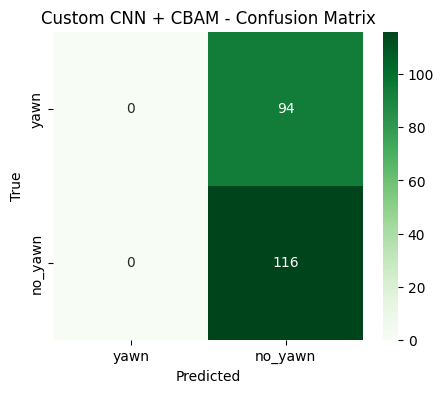

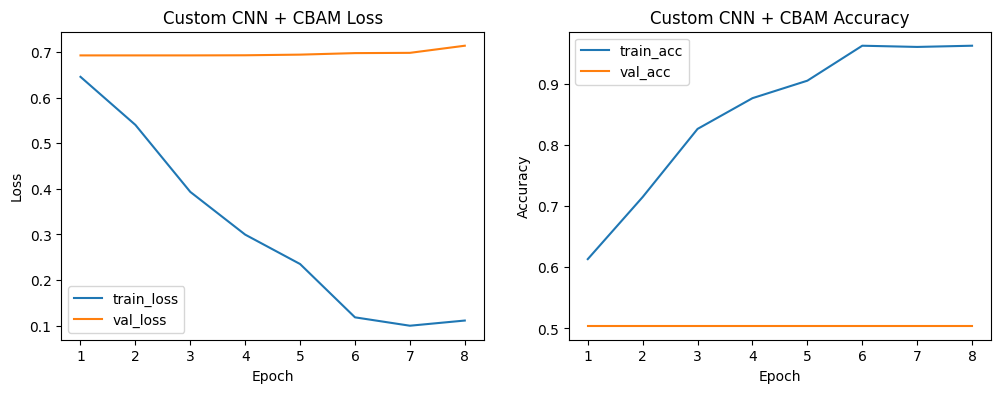

In [41]:

# -------------------------
# Evaluate on test set
# -------------------------
test_loss_cbam, test_acc_cbam = custom_model_cbam.evaluate(test_ds)
print(f"\nCustom CNN + CBAM Test Loss: {test_loss_cbam:.4f}, Test Accuracy: {test_acc_cbam:.4f}")

# -------------------------
# Get true labels and predictions
# -------------------------
y_true_cbam, y_pred_cbam = get_labels_and_predictions(custom_model_cbam, test_ds)

# -------------------------
# Confusion matrix & classification report
# -------------------------
cm_cbam = confusion_matrix(y_true_cbam, y_pred_cbam)
print("\nCustom CNN + CBAM - Classification Report:\n")
print(classification_report(y_true_cbam, y_pred_cbam, target_names=class_names, zero_division=0))

# -------------------------
# Plot confusion matrix
# -------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm_cbam, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Custom CNN + CBAM - Confusion Matrix')
plt.show()

# -------------------------
# Plot training history (accuracy & loss)
# -------------------------
plot_history(history_cbam, title_prefix="Custom CNN + CBAM")


## **Transfer Learning with Mobilenet V2**

In [43]:
# -------------------------
# Transfer Learning approach (MobileNetV2)
# -------------------------
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess

def build_tl_model(base_trainable=False, input_shape=IMG_SIZE + (3,)):
    # Input + augmentation
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    # Use MobileNetV2 preprocessing (scales to [-1,1])
    x = layers.Lambda(mobilenet_preprocess)(x)
    base = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape, pooling='avg')
    base.trainable = base_trainable
    x = base(x, training=False)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs, name='mobilenetv2_tl')
    return model

In [44]:
# Build with base frozen
tl_model = build_tl_model(base_trainable=False)
tl_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
tl_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_tl"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_6 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [45]:
# Train top head first
callbacks_tl = [
    keras.callbacks.ModelCheckpoint("tl_top_best.h5", save_best_only=True, monitor='val_accuracy'),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
]

history_tl_top = tl_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_TL,
    callbacks=callbacks_tl
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.4868 - loss: 0.7650 - val_accuracy: 0.5893 - val_loss: 0.6063
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6572 - loss: 0.6174 - val_accuracy: 0.6607 - val_loss: 0.5776
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6739 - loss: 0.5778 - val_accuracy: 0.6652 - val_loss: 0.5686
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6782 - loss: 0.5700 - val_accuracy: 0.6875 - val_loss: 0.5510
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6901 - loss: 0.5426 - val_accuracy: 0.7054 - val_loss: 0.5433
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.7215 - loss: 0.5206 - val_accuracy: 0.7054 - val_loss: 0.5378
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.7099 - loss: 0.5256 - val_accuracy: 0.7054 - val_loss: 0.5369
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7628 - loss: 0.4800 - val_accuracy: 0.6875 -

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.7852 - loss: 0.4587

TL (top only) Test Loss: 0.4777, Test Accuracy: 0.7714

TL (top only) - Classification Report:

              precision    recall  f1-score   support

        yawn       0.98      0.50      0.66        94
     no_yawn       0.71      0.99      0.83       116

    accuracy                           0.77       210
   macro avg       0.84      0.75      0.74       210
weighted avg       0.83      0.77      0.75       210



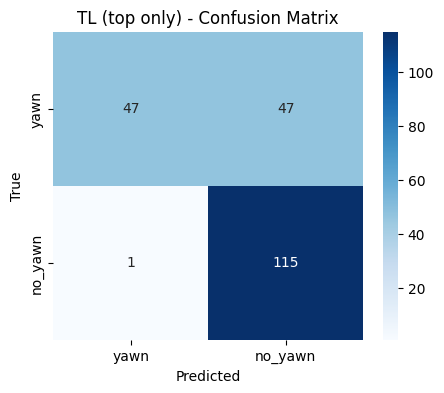

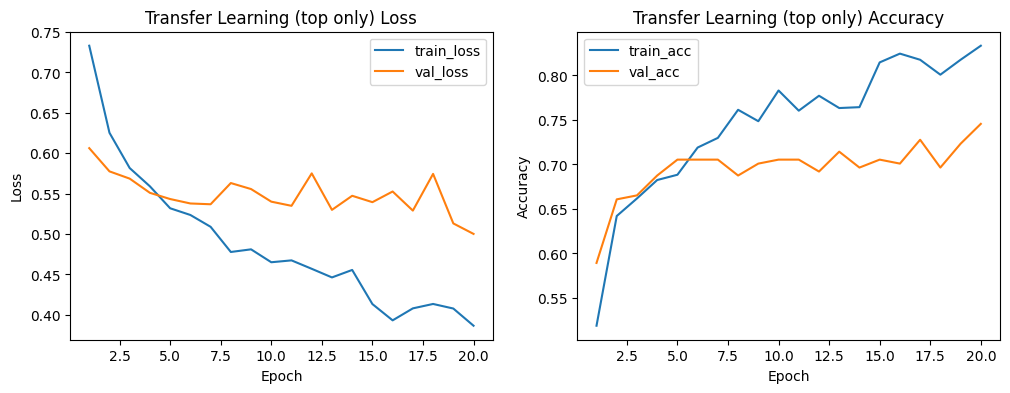

In [46]:
# Evaluate the transfer model (base frozen)
test_loss_tl, test_acc_tl = tl_model.evaluate(test_ds)
print(f"\nTL (top only) Test Loss: {test_loss_tl:.4f}, Test Accuracy: {test_acc_tl:.4f}")

y_true_t, y_pred_t = get_labels_and_predictions(tl_model, test_ds)
cm_t = confusion_matrix(y_true_t, y_pred_t)
print("\nTL (top only) - Classification Report:\n")
print(classification_report(y_true_t, y_pred_t, target_names=class_names))

plt.figure(figsize=(5,4))
sns.heatmap(cm_t, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('TL (top only) - Confusion Matrix')
plt.show()

plot_history(history_tl_top, title_prefix="Transfer Learning (top only)")

## **FineTune some Top layers of Base Model**

In [ ]:
# -------------------------
# Optional: Fine-tune some top layers of base model
# -------------------------
# Unfreeze last few layers of the base model and fine-tune

base_model = tl_model.get_layer(index=3)  # MobileNetV2 base (index may vary); safer to find by name
print("\nBase model found:", base_model.name)
# Set trainable layers (unfreeze last n layers)
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze last N layers for fine-tuning
UNFREEZE_AT = -10  # unfreeze the last 10 layers; tune as needed
if UNFREEZE_AT < 0:
    for layer in base_model.layers[UNFREEZE_AT:]:
        layer.trainable = True

# Recompile with lower LR
tl_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [96]:
# Fine-tune training
history_tl_finetune = tl_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_TL,
    callbacks=[
        keras.callbacks.ModelCheckpoint("tl_finetune_best.h5", save_best_only=True, monitor='val_accuracy'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8438 - loss: 0.4220 - val_accuracy: 0.5804 - val_loss: 0.6545
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9062 - loss: 0.3382 - val_accuracy: 0.5848 - val_loss: 0.6544
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9062 - loss: 0.3971 - val_accuracy: 0.5804 - val_loss: 0.6543
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9688 - loss: 0.2726 - val_accuracy: 0.5848 - val_loss: 0.6543
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.3572 - val_accuracy: 0.5848 - val_loss: 0.6543
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9062 - loss: 0.3373 - val_accuracy: 0.5938 - val_loss: 0.6543
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8438 - loss: 0.3880 - val_accuracy: 0.5982 - val_loss: 0.6543
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9375 - loss: 0.3431 - val_accuracy: 0.6027 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5961 - loss: 0.7071

TL (fine-tuned) Test Loss: 0.6978, Test Accuracy: 0.5952

TL (fine-tuned) - Classification Report:

              precision    recall  f1-score   support

        yawn       0.54      0.63      0.58        94
     no_yawn       0.65      0.57      0.61       116

    accuracy                           0.60       210
   macro avg       0.60      0.60      0.59       210
weighted avg       0.60      0.60      0.60       210



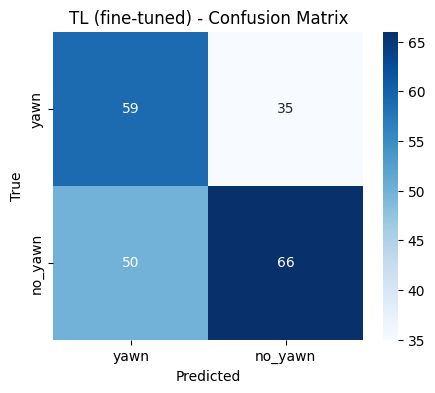

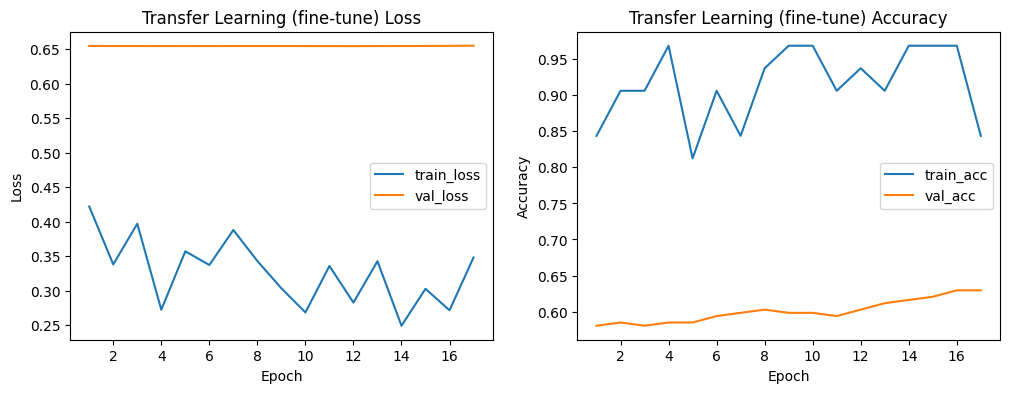

In [97]:
# Evaluate fine-tuned model
test_loss_tl_ft, test_acc_tl_ft = tl_model.evaluate(test_ds)
print(f"\nTL (fine-tuned) Test Loss: {test_loss_tl_ft:.4f}, Test Accuracy: {test_acc_tl_ft:.4f}")

y_true_tf, y_pred_tf = get_labels_and_predictions(tl_model, test_ds)
cm_tf = confusion_matrix(y_true_tf, y_pred_tf)
print("\nTL (fine-tuned) - Classification Report:\n")
print(classification_report(y_true_tf, y_pred_tf, target_names=class_names))

plt.figure(figsize=(5,4))
sns.heatmap(cm_tf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('TL (fine-tuned) - Confusion Matrix')
plt.show()

plot_history(history_tl_finetune, title_prefix="Transfer Learning (fine-tune)")

In [98]:
# -------------------------
# Final summary prints
# -------------------------
print("\n=== Final Results Summary ===")
print(f"Custom CNN -> Test accuracy: {test_acc:.4f}, loss: {test_loss:.4f}")
print(f"TL (top only) -> Test accuracy: {test_acc_tl:.4f}, loss: {test_loss_tl:.4f}")
print(f"TL (fine-tuned) -> Test accuracy: {test_acc_tl_ft:.4f}, loss: {test_loss_tl_ft:.4f}")

# Optional: save models
custom_model.save("custom_cnn_model.h5")
tl_model.save("mobilenetv2_finetuned.h5")

print("\nSaved models: custom_cnn_model.h5 and mobilenetv2_finetuned.h5")


=== Final Results Summary ===
Custom CNN -> Test accuracy: 0.4476, loss: 0.6950
TL (top only) -> Test accuracy: 0.5810, loss: 0.6951
TL (fine-tuned) -> Test accuracy: 0.5952, loss: 0.6978

Saved models: custom_cnn_model.h5 and mobilenetv2_finetuned.h5
